The following project is about types of glasses and our objective is the study of classification of types of glass motivated by criminological investigation.The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. Let's first start importing the packages necessary for this analysis.

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import *
import statsmodels.api as sm
import networkx as nx
import requests
from flask import Flask
import sqlalchemy
import pytest
import tkinter as tk
import openpyxl

Now that we have the basic list of packages and libraries, let's upload the csv into a dataframe using pandas and get a general outloook of the entire database.

In [174]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv'
glass_data = pd.read_csv(url)
print(glass_data)

       1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00    0.00    1
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00    0.00    1
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00    0.00    1
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00    0.00    1
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00    0.26    1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...     ...  ...
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06    0.00    7
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59    0.00    7
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64    0.00    7
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57    0.00    7
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67    0.00    7

[213 rows x 11 columns]


We can see that none of the columns have header names. We will have to insert them based on the details provided to us in the project file. The details are the following- 
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

Let's insert the header names to the dataframe's columns and then look at the dataframe. 

In [175]:
header_names = [
    'Id number',
    'RI',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Ba',
    'Fe',
    'Type of glass'
]
glass_data.columns = header_names
print(glass_data)

     Id number       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
0            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00   
1            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00   
2            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00   
3            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00   
4            6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26   
..         ...      ...    ...   ...   ...    ...   ...   ...   ...   ...   
208        210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00   
209        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00   

     Type of glass  
0                1  
1                1  
2           

Let's look at the first 30 values of the dataframe using the head() command.

In [22]:
glass_data.head(30)

Id number       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  \
0           2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00   
1           3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00   
2           4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00   
3           5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00   
4           6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26   
5           7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00   
6           8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00   
7           9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00   
8          10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11   
9          11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24   
10         12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00   
11         13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24   
12         14  1.51748  12.86  3.56  1.27  73.21  0.54  8.38  0.0  0.17   
13         15  1.51763  12.61  3.59  1.31  73.29  0.58  8.50  0.0  0.00   
14         16  1.51761  12.81  3.54  1.23  73.24  0.58  8.39  0.0  0.00   
15         17  1.51784  12.68  3.67  1.16  73.11  0.61  8.70  0.0  0.00   
16         18  1.52196  14.36  3.85  0.89  71.36  0.15  9.15  0.0  0.00   
17         19  1.51911  13.90  3.73  1.18  72.12  0.06  8.89  0.0  0.00   
18         20  1.51735  13.02  3.54  1.69  72.73  0.54  8.44  0.0  0.07   
19         21  1.51750  12.82  3.55  1.49  72.75  0.54  8.52  0.0  0.19   
20         22  1.51966  14.77  3.75  0.29  72.02  0.03  9.00  0.0  0.00   
21         23  1.51736  12.78  3.62  1.29  72.79  0.59  8.70  0.0  0.00   
22         24  1.51751  12.81  3.57  1.35  73.02  0.62  8.59  0.0  0.00   
23         25  1.51720  13.38  3.50  1.15  72.85  0.50  8.43  0.0  0.00   
24         26  1.51764  12.98  3.54  1.21  73.00  0.65  8.53  0.0  0.00   
25         27  1.51793  13.21  3.48  1.41  72.64  0.59  8.43  0.0  0.00   
26         28  1.51721  12.87  3.48  1.33  73.04  0.56  8.43  0.0  0.00   
27         29  1.51768  12.56  3.52  1.43  73.15  0.57  8.54  0.0  0.00   
28         30  1.51784  13.08  3.49  1.28  72.86  0.60  8.49  0.0  0.00   
29         31  1.51768  12.65  3.56  1.30  73.08  0.61  8.69  0.0  0.14   

    Type of glass  
0               1  
1               1  
2               1  
3               1  
4               1  
5               1  
6               1  
7               1  
8               1  
9               1  
10              1  
11              1  
12              1  
13              1  
14              1  
15              1  
16              1  
17              1  
18              1  
19              1  
20              1  
21              1  
22              1  
23              1  
24              1  
25              1  
26              1  
27              1  
28              1  
29              1

Now let's look at the last 30 values of the dataframe using the tail() command.

In [23]:
glass_data.tail(30)

Id number       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
183        185  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00   
184        186  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00   
185        187  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00   
186        188  1.52315  13.44  3.34  1.23  72.38  0.60  8.83  0.00  0.00   
187        189  1.52247  14.86  2.20  2.06  70.26  0.76  9.76  0.00  0.00   
188        190  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00   
189        191  1.51613  13.88  1.78  1.79  73.10  0.00  8.67  0.76  0.00   
190        192  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09   
191        193  1.51623  14.20  0.00  2.79  73.46  0.04  9.04  0.40  0.09   
192        194  1.51719  14.75  0.00  2.00  73.02  0.00  8.53  1.59  0.08   
193        195  1.51683  14.56  0.00  1.98  73.29  0.00  8.52  1.57  0.07   
194        196  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61  0.05   
195        197  1.51556  13.87  0.00  2.54  73.23  0.14  9.41  0.81  0.01   
196        198  1.51727  14.70  0.00  2.34  73.28  0.00  8.95  0.66  0.00   
197        199  1.51531  14.38  0.00  2.66  73.10  0.04  9.08  0.64  0.00   
198        200  1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00   
199        201  1.51508  15.15  0.00  2.25  73.50  0.00  8.34  0.63  0.00   
200        202  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00   
201        203  1.51514  14.85  0.00  2.42  73.72  0.00  8.39  0.56  0.00   
202        204  1.51658  14.80  0.00  1.99  73.11  0.00  8.28  1.71  0.00   
203        205  1.51617  14.95  0.00  2.27  73.30  0.00  8.71  0.67  0.00   
204        206  1.51732  14.95  0.00  1.80  72.99  0.00  8.61  1.55  0.00   
205        207  1.51645  14.94  0.00  1.87  73.11  0.00  8.67  1.38  0.00   
206        208  1.51831  14.39  0.00  1.82  72.86  1.41  6.47  2.88  0.00   
207        209  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.00   
208        210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00   
209        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00   

     Type of glass  
183              6  
184              7  
185              7  
186              7  
187              7  
188              7  
189              7  
190              7  
191              7  
192              7  
193              7  
194              7  
195              7  
196              7  
197              7  
198              7  
199              7  
200              7  
201              7  
202              7  
203              7  
204              7  
205              7  
206              7  
207              7  
208              7  
209              7  
210              7  
211              7  
212              7

We can see that the type of glass has classified in the following format-

•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps

The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

There was a row omitted when i was applying the header names to the columns, so let's add that into the dataframe using the concat method.

In [176]:
new_row = {
    'Id number': 215,
    'RI': 1.52101,
    'Na': 13.64,
    'Mg': 4.49,
    'Al': 1.10,
    'Si': 71.78,
    'K': 0.06,
    'Ca': 8.75,
    'Ba': 0.00,
    'Fe': 0.00,
    'Type of glass': 1
}
glass_data = pd.concat([glass_data, pd.DataFrame([new_row])], ignore_index=True)
print(glass_data)

     Id number       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
0            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00   
1            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00   
2            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00   
3            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00   
4            6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26   
..         ...      ...    ...   ...   ...    ...   ...   ...   ...   ...   
209        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00   
213        215  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00   

     Type of glass  
0                1  
1                1  
2           

Now there are there are 214 observations in the dataset. Now let's check if it has been added to the dataframe.

In [25]:
glass_data.head(30)

Id number       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  \
0           2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00   
1           3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00   
2           4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00   
3           5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00   
4           6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26   
5           7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00   
6           8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00   
7           9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00   
8          10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11   
9          11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24   
10         12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00   
11         13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24   
12         14  1.51748  12.86  3.56  1.27  73.21  0.54  8.38  0.0  0.17   
13         15  1.51763  12.61  3.59  1.31  73.29  0.58  8.50  0.0  0.00   
14         16  1.51761  12.81  3.54  1.23  73.24  0.58  8.39  0.0  0.00   
15         17  1.51784  12.68  3.67  1.16  73.11  0.61  8.70  0.0  0.00   
16         18  1.52196  14.36  3.85  0.89  71.36  0.15  9.15  0.0  0.00   
17         19  1.51911  13.90  3.73  1.18  72.12  0.06  8.89  0.0  0.00   
18         20  1.51735  13.02  3.54  1.69  72.73  0.54  8.44  0.0  0.07   
19         21  1.51750  12.82  3.55  1.49  72.75  0.54  8.52  0.0  0.19   
20         22  1.51966  14.77  3.75  0.29  72.02  0.03  9.00  0.0  0.00   
21         23  1.51736  12.78  3.62  1.29  72.79  0.59  8.70  0.0  0.00   
22         24  1.51751  12.81  3.57  1.35  73.02  0.62  8.59  0.0  0.00   
23         25  1.51720  13.38  3.50  1.15  72.85  0.50  8.43  0.0  0.00   
24         26  1.51764  12.98  3.54  1.21  73.00  0.65  8.53  0.0  0.00   
25         27  1.51793  13.21  3.48  1.41  72.64  0.59  8.43  0.0  0.00   
26         28  1.51721  12.87  3.48  1.33  73.04  0.56  8.43  0.0  0.00   
27         29  1.51768  12.56  3.52  1.43  73.15  0.57  8.54  0.0  0.00   
28         30  1.51784  13.08  3.49  1.28  72.86  0.60  8.49  0.0  0.00   
29         31  1.51768  12.65  3.56  1.30  73.08  0.61  8.69  0.0  0.14   

    Type of glass  
0               1  
1               1  
2               1  
3               1  
4               1  
5               1  
6               1  
7               1  
8               1  
9               1  
10              1  
11              1  
12              1  
13              1  
14              1  
15              1  
16              1  
17              1  
18              1  
19              1  
20              1  
21              1  
22              1  
23              1  
24              1  
25              1  
26              1  
27              1  
28              1  
29              1

In [26]:
glass_data.tail(30)

Id number       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
184        186  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00   
185        187  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00   
186        188  1.52315  13.44  3.34  1.23  72.38  0.60  8.83  0.00  0.00   
187        189  1.52247  14.86  2.20  2.06  70.26  0.76  9.76  0.00  0.00   
188        190  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00   
189        191  1.51613  13.88  1.78  1.79  73.10  0.00  8.67  0.76  0.00   
190        192  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09   
191        193  1.51623  14.20  0.00  2.79  73.46  0.04  9.04  0.40  0.09   
192        194  1.51719  14.75  0.00  2.00  73.02  0.00  8.53  1.59  0.08   
193        195  1.51683  14.56  0.00  1.98  73.29  0.00  8.52  1.57  0.07   
194        196  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61  0.05   
195        197  1.51556  13.87  0.00  2.54  73.23  0.14  9.41  0.81  0.01   
196        198  1.51727  14.70  0.00  2.34  73.28  0.00  8.95  0.66  0.00   
197        199  1.51531  14.38  0.00  2.66  73.10  0.04  9.08  0.64  0.00   
198        200  1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00   
199        201  1.51508  15.15  0.00  2.25  73.50  0.00  8.34  0.63  0.00   
200        202  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00   
201        203  1.51514  14.85  0.00  2.42  73.72  0.00  8.39  0.56  0.00   
202        204  1.51658  14.80  0.00  1.99  73.11  0.00  8.28  1.71  0.00   
203        205  1.51617  14.95  0.00  2.27  73.30  0.00  8.71  0.67  0.00   
204        206  1.51732  14.95  0.00  1.80  72.99  0.00  8.61  1.55  0.00   
205        207  1.51645  14.94  0.00  1.87  73.11  0.00  8.67  1.38  0.00   
206        208  1.51831  14.39  0.00  1.82  72.86  1.41  6.47  2.88  0.00   
207        209  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.00   
208        210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00   
209        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00   
213        215  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00   

     Type of glass  
184              7  
185              7  
186              7  
187              7  
188              7  
189              7  
190              7  
191              7  
192              7  
193              7  
194              7  
195              7  
196              7  
197              7  
198              7  
199              7  
200              7  
201              7  
202              7  
203              7  
204              7  
205              7  
206              7  
207              7  
208              7  
209              7  
210              7  
211              7  
212              7  
213              1

We can see that the row has been added to the last field. Now let's declare the input variables and the output variables in the dataframe.

In [27]:
glass_dataxvariable=glass_data.iloc[:,:-1]

In [28]:
glass_dataxvariable

Id number       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe
0            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00
1            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00
2            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00
3            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00
4            6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26
..         ...      ...    ...   ...   ...    ...   ...   ...   ...   ...
209        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00
210        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00
211        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00
212        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00
213        215  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00

[214 rows x 10 columns]

Now let's declare the output variable which the type of glass column.

In [29]:
glass_datayvariable=glass_data.iloc[:,[-1]]

In [30]:
glass_datayvariable

Type of glass
0                1
1                1
2                1
3                1
4                1
..             ...
209              7
210              7
211              7
212              7
213              1

[214 rows x 1 columns]

Now let's check the number of values each variable in the type of glass column consist using the the value counts() method.

In [31]:
glass_data_counts = glass_data['Type of glass'].value_counts()
print(glass_data_counts)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


We can see that glass type building_windows_non_float_processed has the highest number of values and glass type tableware has the lowest number of values.

Now let's get some descriptions from the dataframe using the describe() method.

In [32]:
glass_data_details = glass_data.describe()
print(glass_data_details)

        Id number          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   108.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      2.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     55.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    108.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    161.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    215.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe  Type of glass  
count  214.000000  214.000000  214.000000  214.000000     214.000000  
mean     0.497056    8.956963    0.175047    0.057009       2.780374  
std      0.652192    1.423153    0.497219    0.097439    

Below are the key descriptions we get from the dataset-

Median of Id number is(108.500000) is equal to its mean(108.500000), which means no outliers are present.

Median of RI(1.517680) is lower than its mean(1.518365), which means few outliers are present- +vely skewed

Median of Na(13.300000) is quite lower than its mean(13.407850), which means some outliers are present- +vely skewed

Median of Al(1.360000) is quite lower than its mean(1.444907), which means few outliers are present- +ve

Median of Mg(3.480000) is quite higher than its mean(2.684533), which means some outliers are present- -ve

Median of Si(72.790000) is quite higher than its mean(72.650935), which means few outliers are present- -ve

Median of K(0.555000) is pretty higher than its mean(0.497056), which means a lot of outliers are present- -ve

Median of Ca(8.600000) is pretty lower than its mean(8.956963), which means a lot of outliers are present- +ve

Median of Ba(0.000000) is pretty lower than its mean(0.175047), which means a lot of outliers are present- +ve

Median of Fe(0.000000) is pretty lower than its mean(0.057009), which means a lot of outliers are present- +ve

Median of Type of Glass(14.454200) is pretty lower than its mean(32.204208), which means a lot of outliers are present- +ve

The total count of all columns is 214 values.

The maximum values of each column are as follows:-

ID number: 215, iqr = 136.50000

RI: 1.533930, iqr= 0.002635

Na:17.380000, iqr= 0.9175

Al: 3.500000, iqr= 0.44

Mg: 4.490000,iqr= 1.48500

Si: 75.410000,iqr= 3.13

K: 6.210000,iqr= 0.4875

Ca:16.190000,iqr=0.9325
    
Ba:3.150000,iqr=0.0

Fe:0.510000,iqr=0.1

Type of Glass:7.000000,iqr=2.0

Now let's get some information from the dataframe using the .info() method

In [33]:
glass_data_info = glass_data.info
print(glass_data_info)

<bound method DataFrame.info of      Id number       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
0            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00   
1            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00   
2            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00   
3            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00   
4            6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26   
..         ...      ...    ...   ...   ...    ...   ...   ...   ...   ...   
209        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00   
213        215  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00   

     Type of glass  
0                1  
1

Now let's get the data thypes of all of the columns using the dtypes method

In [34]:
glass_data.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

We need to change the Id number into float64 values later. Now let's check the absolute values of the dataframe.

In [35]:
absolute_df = glass_data.abs()
print(absolute_df)

     Id number       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
0            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00   
1            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00   
2            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00   
3            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00   
4            6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26   
..         ...      ...    ...   ...   ...    ...   ...   ...   ...   ...   
209        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00   
213        215  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00   

     Type of glass  
0                1  
1                1  
2           

Now let's look at the shape of the dataframe using the .shape method

In [36]:
glass_data.shape

(214, 11)

It has 214 rows and 11 columns. Now let;s look at the names of all the columns in the dataframe. 

In [37]:
glass_data.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

Now let's check the sum of all null values in the dataframe. 

In [38]:
glass_data.isnull().sum().sum()

0

There are no null values in the dataframe. Let's visualise it using the heatmap feature from seaborn library.

<Axes: >

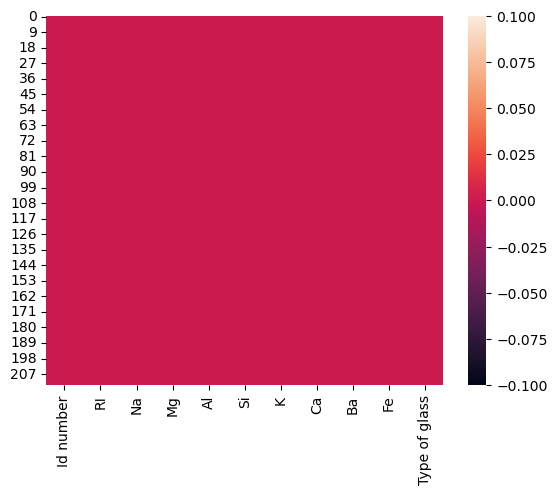

In [39]:
sns.heatmap(glass_data.isnull())

Now let's check the number of unique values in our target column.

In [40]:
glass_data['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [41]:
glass_data['Type of glass'].nunique()

6

There are 6 unique values and glass type 4 is not present.

In [42]:
for i in glass_data.columns:
    print(glass_data[i].value_counts())
    print("/n")

2      1
136    1
138    1
139    1
140    1
      ..
76     1
77     1
78     1
79     1
215    1
Name: Id number, Length: 214, dtype: int64
/n
1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51569    1
1.51605    1
1.51588    1
1.51629    1
1.52101    1
Name: RI, Length: 178, dtype: int64
/n
13.00    5
13.21    5
13.02    5
13.64    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
/n
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.15     1
2.90     1
3.83     1
3.97     1
4.49     1
Name: Mg, Length: 94, dtype: int64
/n
1.54    8
1.19    6
1.56    5
1.29    5
1.23    5
       ..
1.64    1
1.61    1
1.07    1
0.65    1
1.10    1
Name: Al, Length: 118, dtype: int64
/n
72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
71.78    1
Name: Si, Length: 133, dtype: int64
/n
0.00    30
0.57    12
0.56    11
0.60    11
0

From the above value counts, these are the following details we get from it=

1) 1.52152 3
   1.51590 3
   1.51645 3
   RI
2) 13.00    5
   13.21    5
   13.02    5
   Na
3) 0.00    42
   Mg
4) 1.54    8
   Al
5) 72.99    4
   73.10    4
   72.86    4
   73.28    4
   73.11    4
   Si
6) 0.00    30
   K
7) 8.03    5
   8.43    5
   Ca
8) 0.00    176
   Ba
8) 0.00    144
   Fe

Let's declare all the columns that have float64 values.

In [20]:
glass_data_col=[]
for i in glass_data.dtypes.index:
    if glass_data.dtypes[i] == 'float64':
        glass_data_col.append(i)
print("winecateogry columns:", glass_data_col)
print("/n")

winecateogry columns: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
/n


Let's declare all the columns that have int64 values.

In [45]:
glass_data_numerical_col=[]
for i in glass_data.dtypes.index:
    if glass_data.dtypes[i] == 'int64':
        glass_data_numerical_col.append(i)
print("winenumerical columns:", glass_data_numerical_col)
print("/n")

winenumerical columns: ['Id number', 'Type of glass']
/n


For the final time, let's check if there are null values or not

In [46]:
glass_data.loc[glass_data["Type of glass"]==""]

Empty DataFrame
Columns: [Id number, RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type of glass]
Index: []

In [47]:
glass_data.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

Let's check the mean values of our target column

In [48]:
print(glass_data["Type of glass"].mean())

2.7803738317757007


The mean is 2.780

Let's check for all the unique values in all the columns

In [49]:
glass_data.nunique().to_frame("No. of Unique values")

No. of Unique values
Id number                       214
RI                              178
Na                              142
Mg                               94
Al                              118
Si                              133
K                                65
Ca                              143
Ba                               34
Fe                               32
Type of glass                     6

Now let's convert the our target column based on the instructions provided to us in the project query that is The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). We will be using the lambda args method to do the processing.

In [177]:
glass_data['Type of glass'] = glass_data['Type of glass'].apply(lambda x: 1 if x >= 5 else 0)

In [178]:
print(glass_data.head(40))

    Id number       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
0           2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00   
1           3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00   
2           4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00   
3           5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00   
4           6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26   
5           7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.00  0.00   
6           8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.00  0.00   
7           9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.00  0.00   
8          10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11   
9          11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24   
10         12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.00  0.00   
11         13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.00  0.24   
12         1

Now let;s get a glimpse of the the dataframe after the transformation.

In [8]:
glass_data.tail(40)

Id number       RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  \
174        176  1.52119  12.97  0.33  1.51  73.39  0.13  11.27  0.00  0.28   
175        177  1.51905  14.00  2.39  1.56  72.37  0.00   9.57  0.00  0.00   
176        178  1.51937  13.79  2.41  1.19  72.76  0.00   9.77  0.00  0.00   
177        179  1.51829  14.46  2.24  1.62  72.38  0.00   9.26  0.00  0.00   
178        180  1.51852  14.09  2.19  1.66  72.67  0.00   9.32  0.00  0.00   
179        181  1.51299  14.40  1.74  1.54  74.55  0.00   7.59  0.00  0.00   
180        182  1.51888  14.99  0.78  1.74  72.50  0.00   9.95  0.00  0.00   
181        183  1.51916  14.15  0.00  2.09  72.74  0.00  10.88  0.00  0.00   
182        184  1.51969  14.56  0.00  0.56  73.48  0.00  11.22  0.00  0.00   
183        185  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00   
184        186  1.51131  13.69  3.20  1.81  72.81  1.76   5.43  1.19  0.00   
185        187  1.51838  14.32  3.26  2.22  71.25  1.46   5.79  1.63  0.00   
186        188  1.52315  13.44  3.34  1.23  72.38  0.60   8.83  0.00  0.00   
187        189  1.52247  14.86  2.20  2.06  70.26  0.76   9.76  0.00  0.00   
188        190  1.52365  15.79  1.83  1.31  70.43  0.31   8.61  1.68  0.00   
189        191  1.51613  13.88  1.78  1.79  73.10  0.00   8.67  0.76  0.00   
190        192  1.51602  14.85  0.00  2.38  73.28  0.00   8.76  0.64  0.09   
191        193  1.51623  14.20  0.00  2.79  73.46  0.04   9.04  0.40  0.09   
192        194  1.51719  14.75  0.00  2.00  73.02  0.00   8.53  1.59  0.08   
193        195  1.51683  14.56  0.00  1.98  73.29  0.00   8.52  1.57  0.07   
194        196  1.51545  14.14  0.00  2.68  73.39  0.08   9.07  0.61  0.05   
195        197  1.51556  13.87  0.00  2.54  73.23  0.14   9.41  0.81  0.01   
196        198  1.51727  14.70  0.00  2.34  73.28  0.00   8.95  0.66  0.00   
197        199  1.51531  14.38  0.00  2.66  73.10  0.04   9.08  0.64  0.00   
198        200  1.51609  15.01  0.00  2.51  73.05  0.05   8.83  0.53  0.00   
199        201  1.51508  15.15  0.00  2.25  73.50  0.00   8.34  0.63  0.00   
200        202  1.51653  11.95  0.00  1.19  75.18  2.70   8.93  0.00  0.00   
201        203  1.51514  14.85  0.00  2.42  73.72  0.00   8.39  0.56  0.00   
202        204  1.51658  14.80  0.00  1.99  73.11  0.00   8.28  1.71  0.00   
203        205  1.51617  14.95  0.00  2.27  73.30  0.00   8.71  0.67  0.00   
204        206  1.51732  14.95  0.00  1.80  72.99  0.00   8.61  1.55  0.00   
205        207  1.51645  14.94  0.00  1.87  73.11  0.00   8.67  1.38  0.00   
206        208  1.51831  14.39  0.00  1.82  72.86  1.41   6.47  2.88  0.00   
207        209  1.51640  14.37  0.00  2.74  72.85  0.00   9.45  0.54  0.00   
208        210  1.51623  14.14  0.00  2.88  72.61  0.08   9.18  1.06  0.00   
209        211  1.51685  14.92  0.00  1.99  73.06  0.00   8.40  1.59  0.00   
210        212  1.52065  14.36  0.00  2.02  73.42  0.00   8.44  1.64  0.00   
211        213  1.51651  14.38  0.00  1.94  73.61  0.00   8.48  1.57  0.00   
212        214  1.51711  14.23  0.00  2.08  73.36  0.00   8.62  1.67  0.00   
213        215  1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.00  0.00   

     Type of glass  
174              1  
175              1  
176              1  
177              1  
178              1  
179              1  
180              1  
181              1  
182              1  
183              1  
184              1  
185              1  
186              1  
187              1  
188              1  
189              1  
190              1  
191              1  
192              1  
193              1  
194              1  
195              1  
196              1  
197              1  
198              1  
199              1  
200              1  
201              1  
202              1  
203              1  
204              1  
205              1  
206              1  
207              1  
208              1  
209              1  
210              1  
211     

Let's check for the duplicated rows in the dataframe.

In [9]:
print("Total duplicated rows:", glass_data.duplicated().sum())

Total duplicated rows: 0


There are zero duplicated rows in the dataframe. Now we can move into visualisations

Univariate Analysis

Countplots

0    163
1     51
Name: Type of glass, dtype: int64


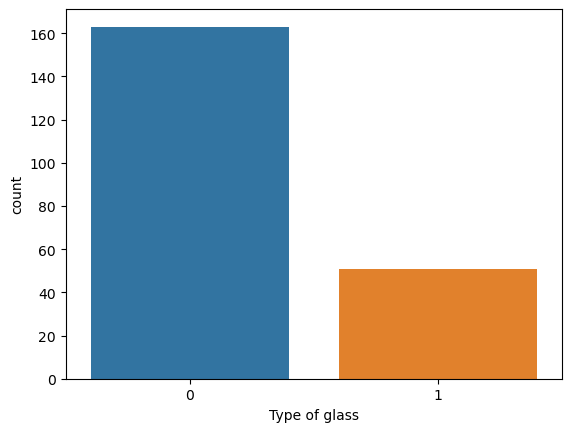

In [10]:
gt=sns.countplot(x='Type of glass',data=glass_data)
print(glass_data['Type of glass'].value_counts())

There are more window glass 163 than non-window glass 51.

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51569    1
1.51605    1
1.51588    1
1.51629    1
1.52101    1
Name: RI, Length: 178, dtype: int64


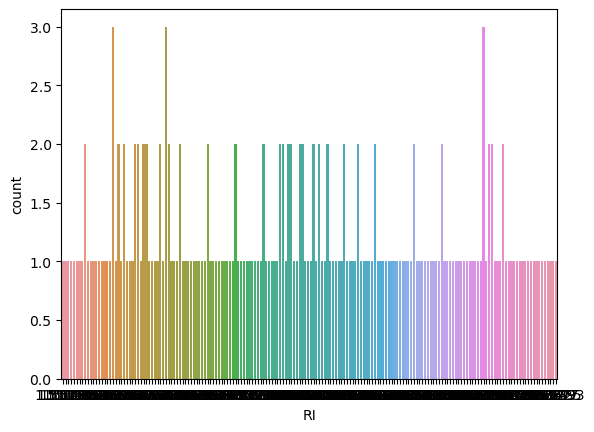

In [11]:
gt1=sns.countplot(x='RI',data=glass_data)
print(glass_data['RI'].value_counts())

Most of the refractive index lie in the range - 1.52152, 1.51590 and 1.51645.   

13.00    5
13.21    5
13.02    5
13.64    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


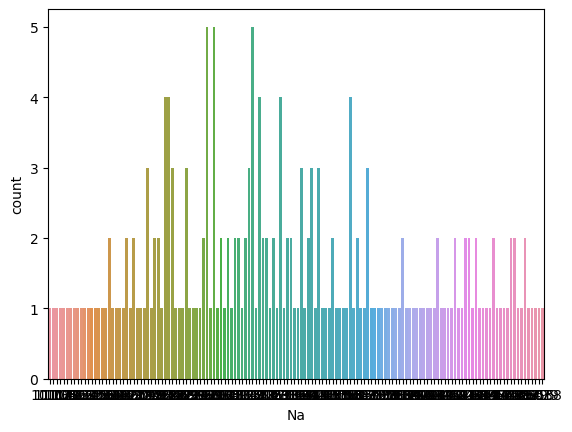

In [12]:
gt2=sns.countplot(x='Na',data=glass_data)
print(glass_data['Na'].value_counts())

Most of the sodium lies in the range 13-13.05

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.15     1
2.90     1
3.83     1
3.97     1
4.49     1
Name: Mg, Length: 94, dtype: int64


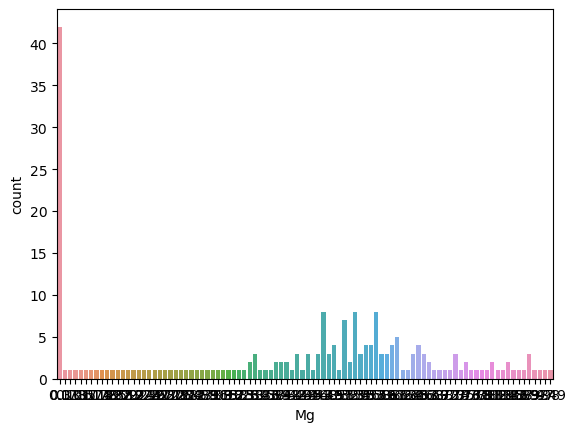

In [13]:
gt3=sns.countplot(x='Mg',data=glass_data)
print(glass_data['Mg'].value_counts())

Most of the magnesium levels lie in the 0.0 range.

1.54    8
1.19    6
1.56    5
1.29    5
1.23    5
       ..
1.64    1
1.61    1
1.07    1
0.65    1
1.10    1
Name: Al, Length: 118, dtype: int64


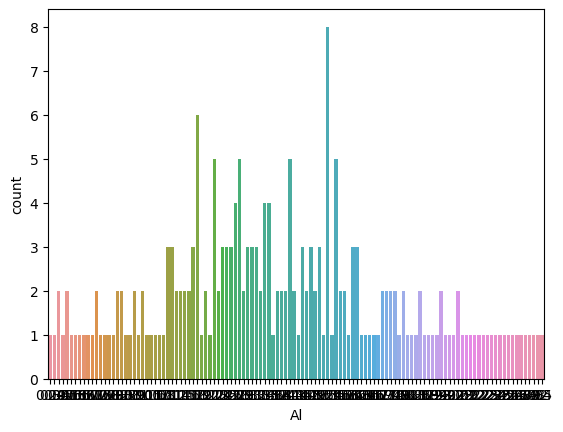

In [14]:
gt4=sns.countplot(x='Al',data=glass_data)
print(glass_data['Al'].value_counts())

Most of the alluminium values lies in the range 1.54.

72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
71.78    1
Name: Si, Length: 133, dtype: int64


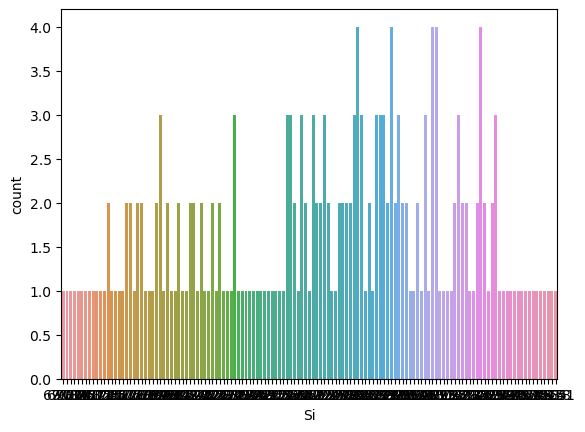

In [15]:
gt4=sns.countplot(x='Si',data=glass_data)
print(glass_data['Si'].value_counts())

Most of the silicon values lies in the 72-73.

0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


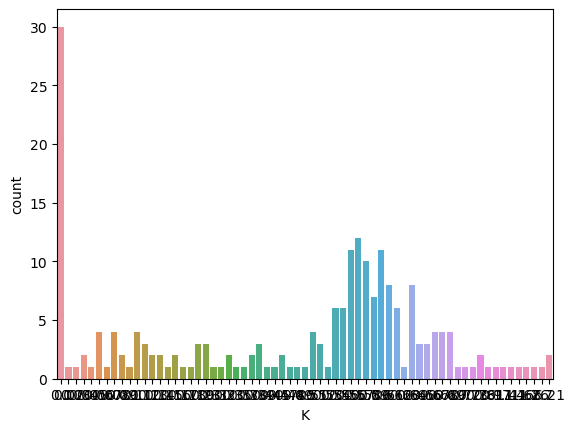

In [16]:
gt5=sns.countplot(x='K',data=glass_data)
print(glass_data['K'].value_counts())

Most of the glasses don't have potassium in their composition 30.

0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: Ba, dtype: int64


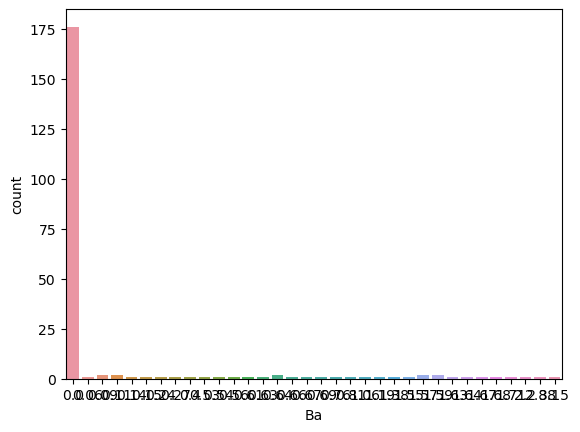

In [17]:
gt6=sns.countplot(x='Ba',data=glass_data)
print(glass_data['Ba'].value_counts())

Most of the glasses have 0 barium in the glass composition.

8.03    5
8.43    5
8.44    4
9.57    4
8.79    4
       ..
8.09    1
8.90    1
9.13    1
7.78    1
8.62    1
Name: Ca, Length: 143, dtype: int64


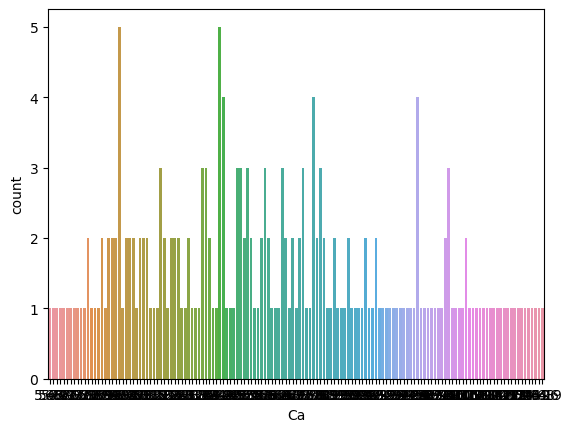

In [33]:
gt8=sns.countplot(x='Ca',data=glass_data)
print(glass_data['Ca'].value_counts())

The calclium in the glass types are on the levels 8.03-5,8.43-5

0.00    144
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: Fe, dtype: int64


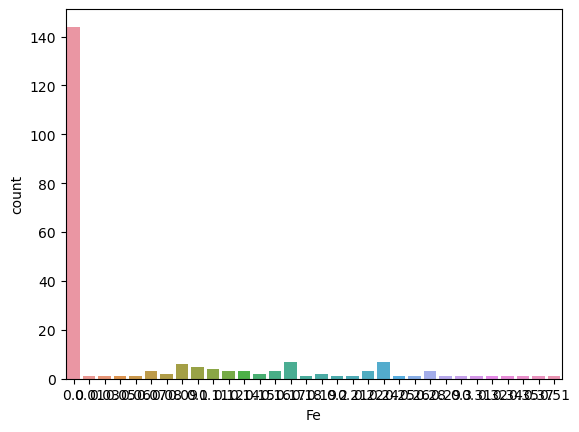

In [18]:
gt7=sns.countplot(x='Fe',data=glass_data)
print(glass_data['Fe'].value_counts())

Most of the glass types have iron level at 0 - 144.

Distribution Plots

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_3300\2526533146.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass_data[col],color="b")
C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_3300\2526533146.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass_data[col],color="b")
C:\U

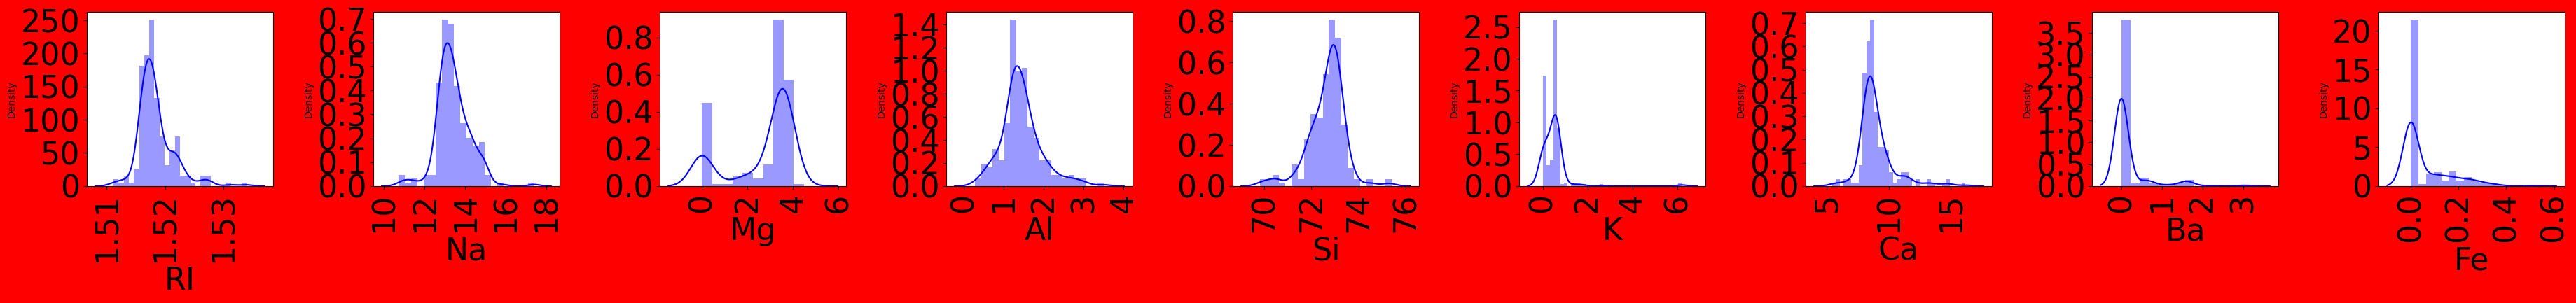

In [21]:
plt.figure(figsize=(45,45),facecolor = "red")
plotnumber=1
for col in glass_data_col:
    if plotnumber<=12:
        wc=plt.subplot(11,11,plotnumber)
        sns.distplot(glass_data[col],color="b")
        plt.xlabel(col,rotation=0,fontsize = 32)
        plt.xticks(rotation=90, fontsize=32)
        plt.yticks(rotation = 0, fontsize = 32)
    plotnumber+=1
plt.tight_layout()

Most of the components are negatively skewed other than Mg and Si.

Bivariate analysis

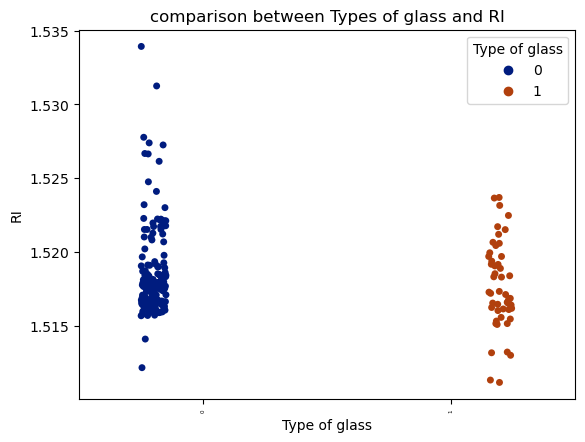

<Figure size 2800x200 with 0 Axes>

In [23]:
plt.title("comparison between Types of glass and RI")
sns.stripplot(x= "Type of glass", y= "RI", data = glass_data,hue='Type of glass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Window glass has more refractive index than non-window glass.

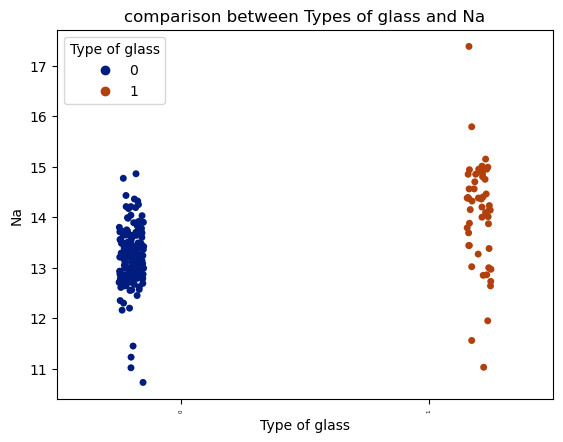

<Figure size 2800x200 with 0 Axes>

In [27]:
plt.title("comparison between Types of glass and Na")
sns.stripplot(x= "Type of glass", y= "Na", data = glass_data,hue='Type of glass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Non-window glass has more sodium than window glass.

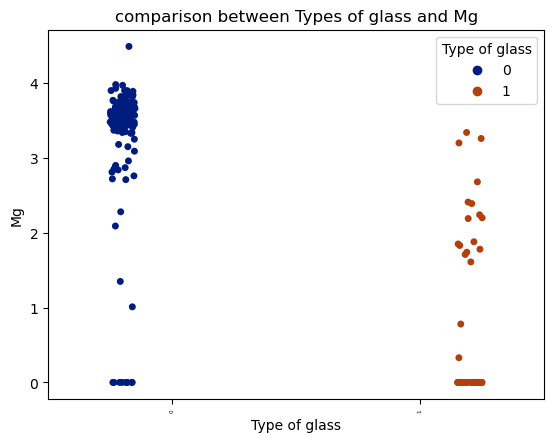

<Figure size 2800x200 with 0 Axes>

In [26]:
plt.title("comparison between Types of glass and Mg")
sns.stripplot(x= "Type of glass", y= "Mg", data = glass_data,hue='Type of glass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Window glass has more magnesium than non-window glass.

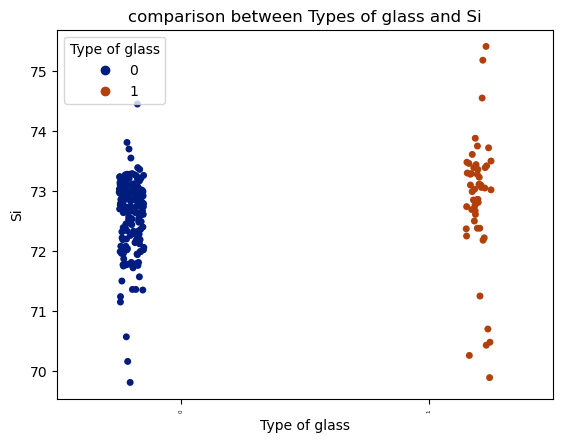

<Figure size 2800x200 with 0 Axes>

In [29]:
plt.title("comparison between Types of glass and Si")
sns.stripplot(x= "Type of glass", y= "Si", data = glass_data,hue='Type of glass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Both window and non-window glasses have silica in its composition

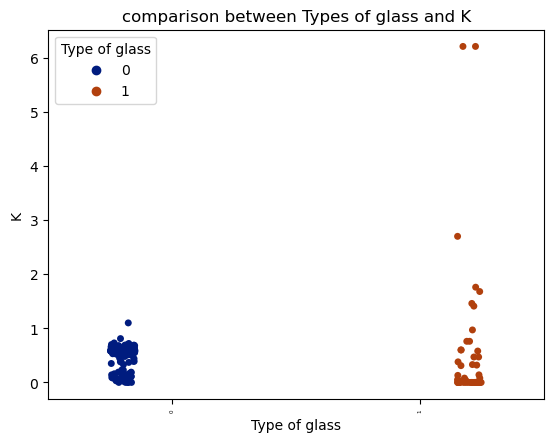

<Figure size 2800x200 with 0 Axes>

In [31]:
plt.title("comparison between Types of glass and K")
sns.stripplot(x= "Type of glass", y= "K", data = glass_data,hue='Type of glass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

In [ ]:
Both window and non-window glass have potassium in its composition.

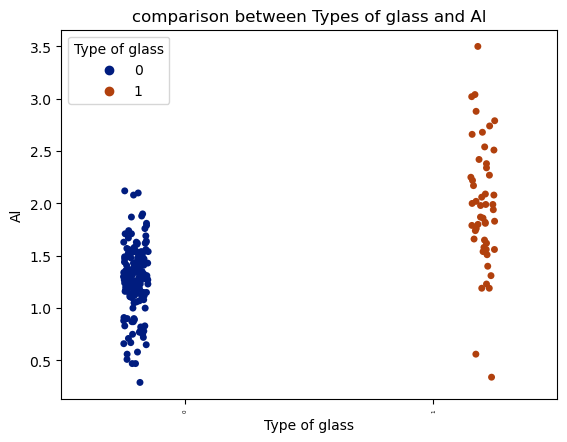

<Figure size 2800x200 with 0 Axes>

In [32]:
plt.title("comparison between Types of glass and Al")
sns.stripplot(x= "Type of glass", y= "Al", data = glass_data,hue='Type of glass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

In [ ]:
Non-window glass has higher composition of alluminium in its composition

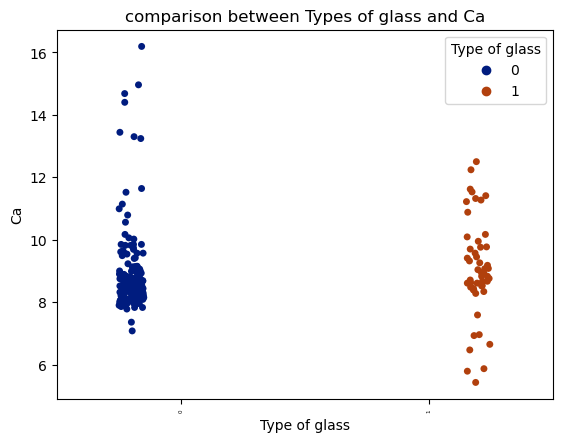

<Figure size 2800x200 with 0 Axes>

In [34]:
plt.title("comparison between Types of glass and Ca")
sns.stripplot(x= "Type of glass", y= "Ca", data = glass_data,hue='Type of glass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

In [ ]:
Some of the window glasses have higher calcium content than non-window glasses.

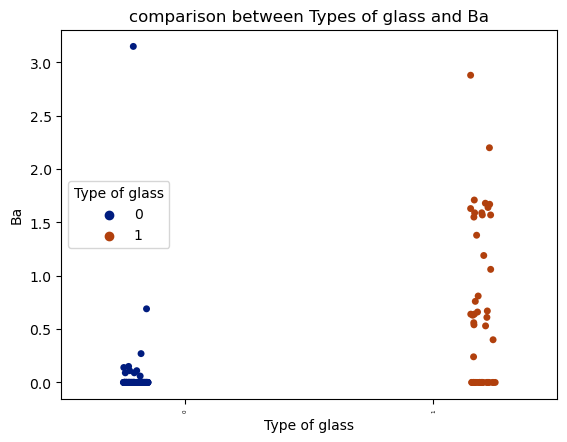

<Figure size 2800x200 with 0 Axes>

In [35]:
plt.title("comparison between Types of glass and Ba")
sns.stripplot(x= "Type of glass", y= "Ba", data = glass_data,hue='Type of glass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

High amounts of barium is present in non-window glasses than the window glasses.

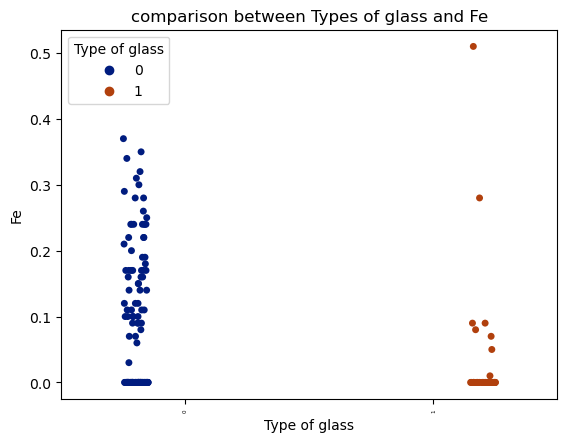

<Figure size 2800x200 with 0 Axes>

In [36]:
plt.title("comparison between Types of glass and Fe")
sns.stripplot(x= "Type of glass", y= "Fe", data = glass_data,hue='Type of glass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Window glasses have higher concentration of iron than non-window glasses.

Scatterplots

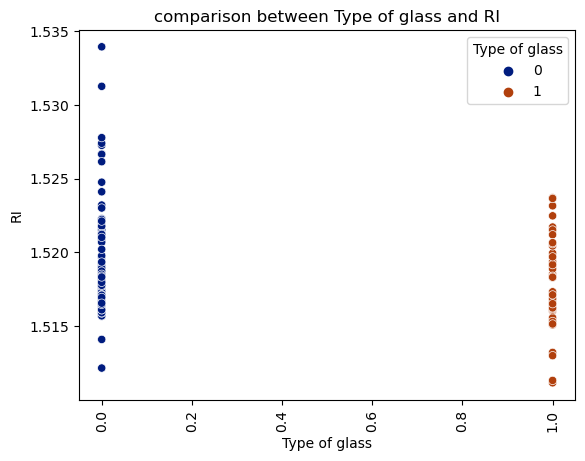

In [40]:
plt.title("comparison between Type of glass and RI")
sns.scatterplot(x= "Type of glass", y= "RI", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [ ]:
Some of the window glass has higher refractive index than non-window glass.

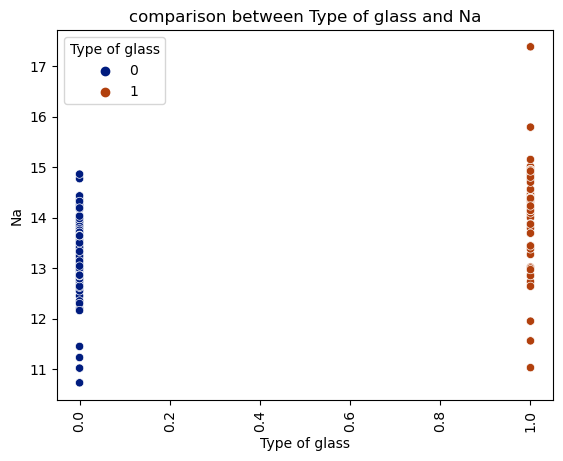

In [41]:
plt.title("comparison between Type of glass and Na")
sns.scatterplot(x= "Type of glass", y= "Na", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Sodium content in some of the non-window glasses is higher than window glasses.

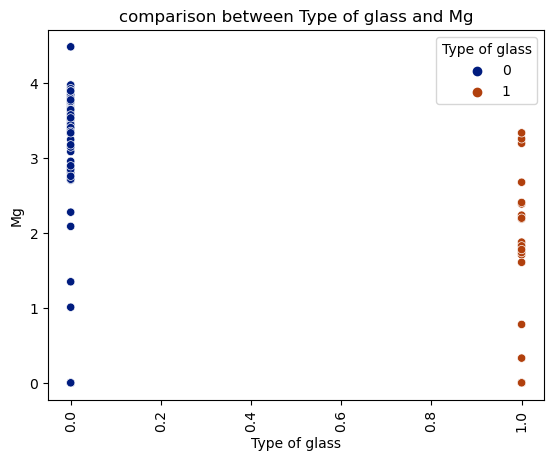

In [42]:
plt.title("comparison between Type of glass and Mg")
sns.scatterplot(x= "Type of glass", y= "Mg", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Window glass has more magnesium than non-window glass.

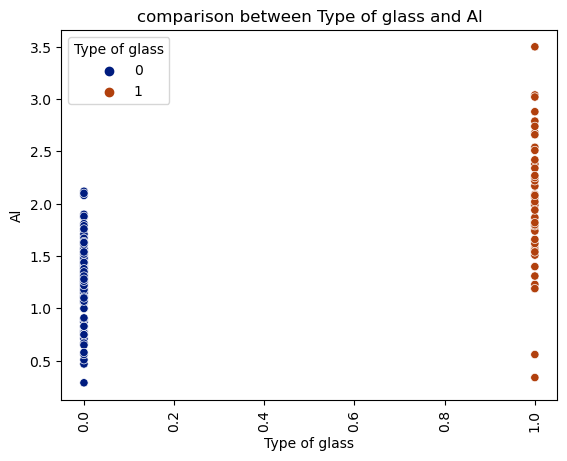

In [43]:
plt.title("comparison between Type of glass and Al")
sns.scatterplot(x= "Type of glass", y= "Al", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Alluminium content is higher in most of the non-window glasses than window glass.

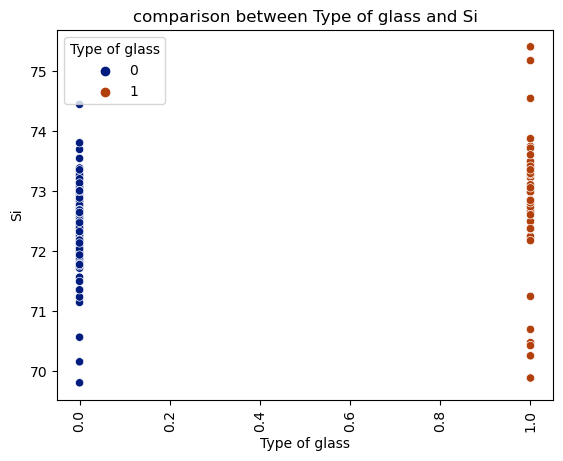

In [44]:
plt.title("comparison between Type of glass and Si")
sns.scatterplot(x= "Type of glass", y= "Si", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Silicon content seems to be almost the same for both the types of glasses.

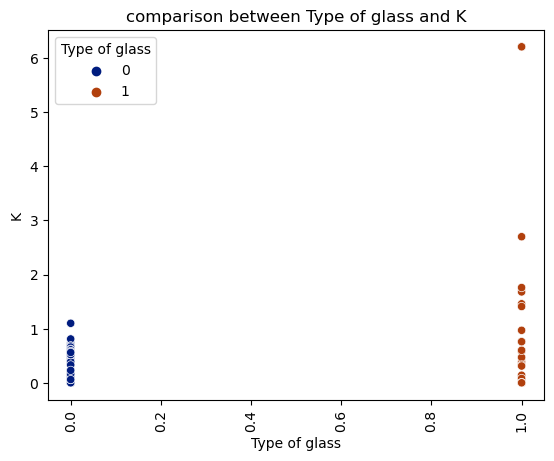

In [45]:
plt.title("comparison between Type of glass and K")
sns.scatterplot(x= "Type of glass", y= "K", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Non-window glasses have a slightly more amount of alluminium than window glasses.

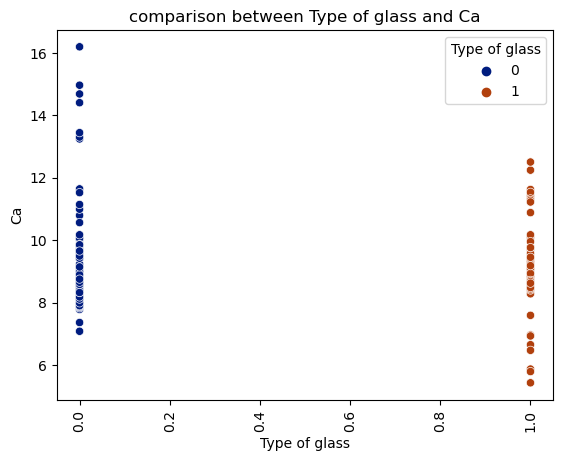

In [46]:
plt.title("comparison between Type of glass and Ca")
sns.scatterplot(x= "Type of glass", y= "Ca", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Some of the window glasses have a higher content of calcium than the non-window glasses.

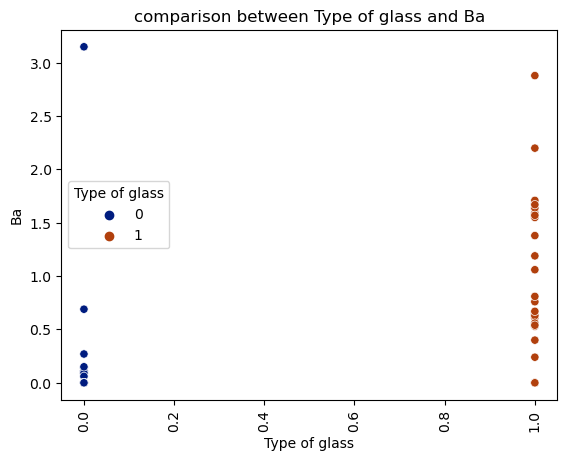

In [47]:
plt.title("comparison between Type of glass and Ba")
sns.scatterplot(x= "Type of glass", y= "Ba", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Barium content is higher in the non-window glasses than the window glasses.

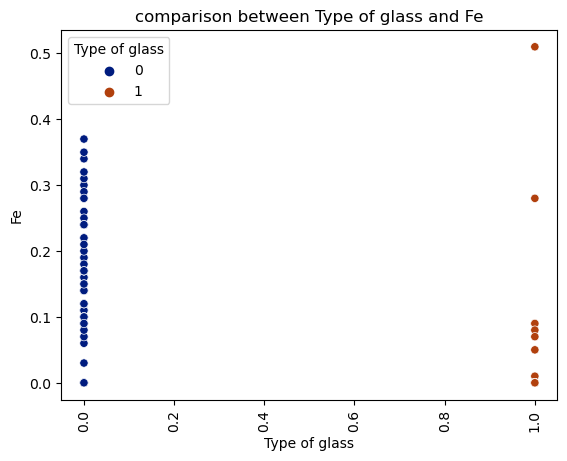

In [48]:
plt.title("comparison between Type of glass and Fe")
sns.scatterplot(x= "Type of glass", y= "Fe", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Most of window glasses have significantly higher content of iron than the non-window glasses.

Barplots

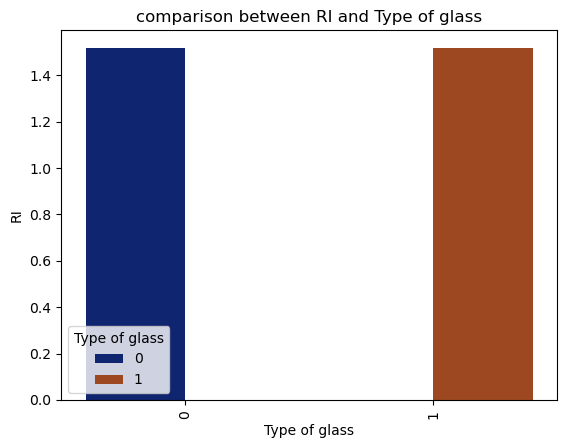

In [50]:
plt.title("comparison between RI and Type of glass")
sns.barplot(x= "Type of glass", y= "RI", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Both the types of window glasses have almost equal amount of refractive indexes.

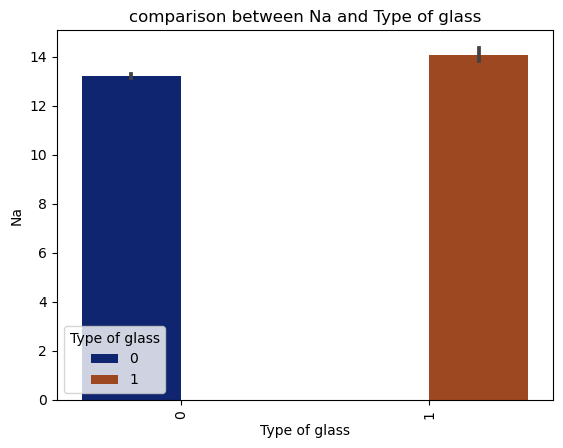

In [51]:
plt.title("comparison between Na and Type of glass")
sns.barplot(x= "Type of glass", y= "Na", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Sodium levels are slightly higher in the non-window glasses than the window glasses.

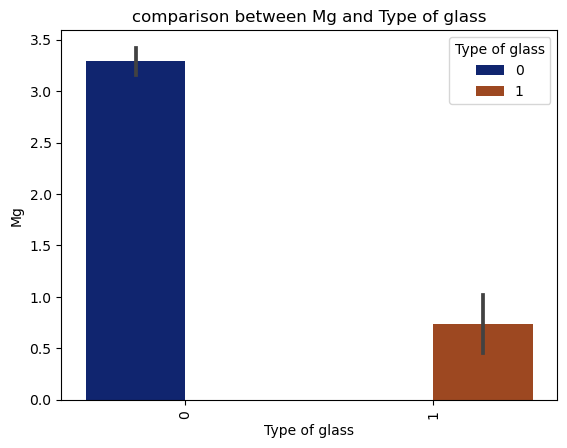

In [52]:
plt.title("comparison between Mg and Type of glass")
sns.barplot(x= "Type of glass", y= "Mg", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Magnesium level are way higher in window glasses than the non-window glases.

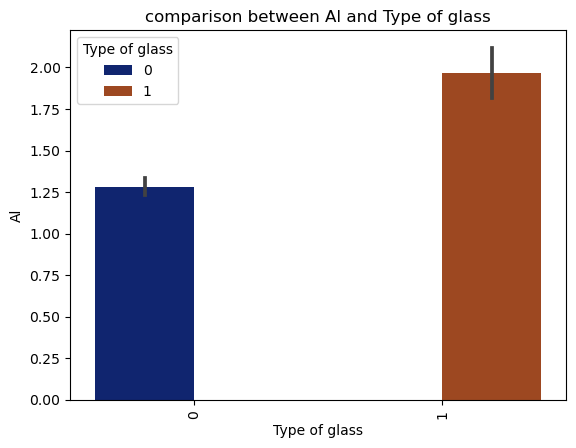

In [53]:
plt.title("comparison between Al and Type of glass")
sns.barplot(x= "Type of glass", y= "Al", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Alluminium levels are higher in non-window glasses than the window glasses.

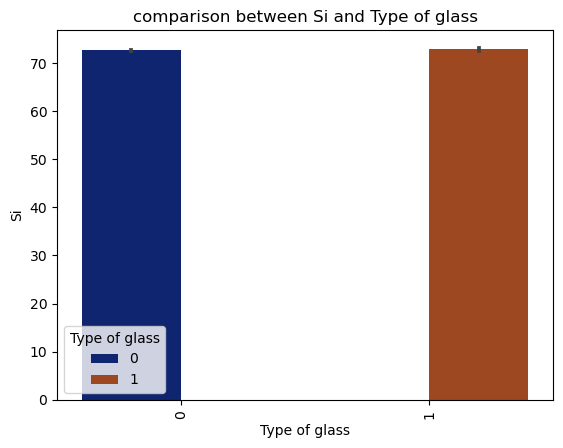

In [54]:
plt.title("comparison between Si and Type of glass")
sns.barplot(x= "Type of glass", y= "Si", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Silicon level seems to be same for both the types of window glasses.

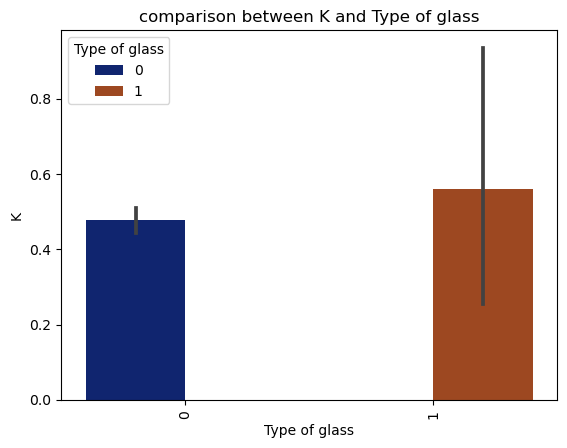

In [55]:
plt.title("comparison between K and Type of glass")
sns.barplot(x= "Type of glass", y= "K", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Potassium seems to be higher in non-window glasses than the window glases.

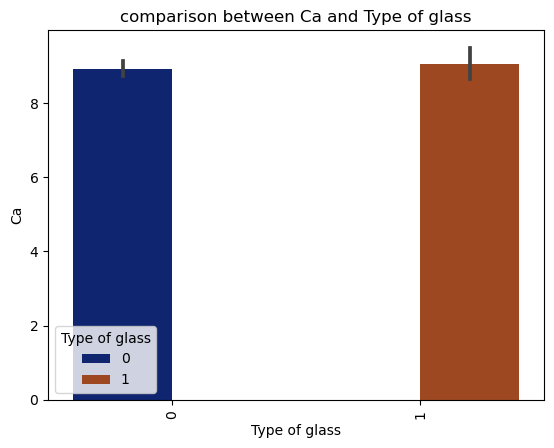

In [56]:
plt.title("comparison between Ca and Type of glass")
sns.barplot(x= "Type of glass", y= "Ca", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Calcium leveels looks normal in boththe type of glasses.

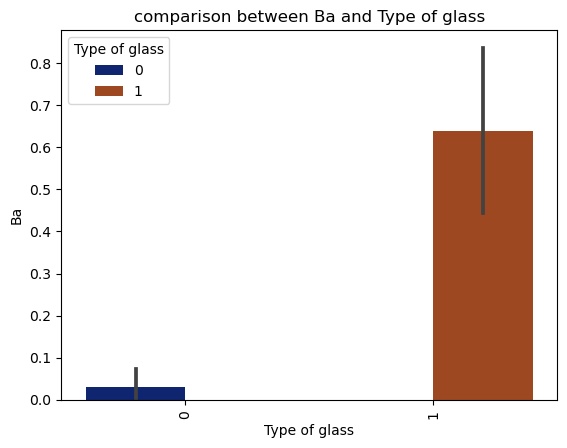

In [57]:
plt.title("comparison between Ba and Type of glass")
sns.barplot(x= "Type of glass", y= "Ba", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Non-window glasses have significantly higher barium than the window glasses.

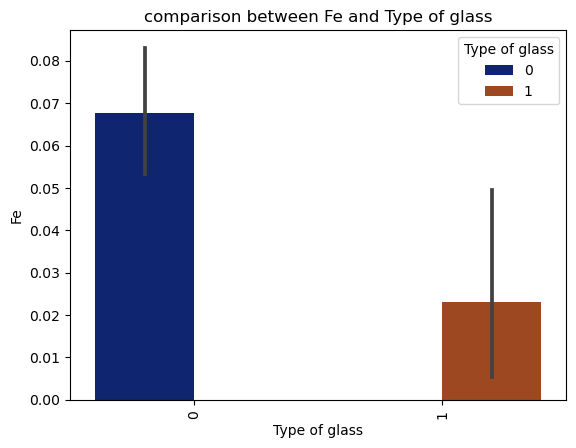

In [58]:
plt.title("comparison between Fe and Type of glass")
sns.barplot(x= "Type of glass", y= "Fe", data = glass_data, hue='Type of glass', palette='dark')
plt.xticks(rotation=90, fontsize=10)
plt.show()

Iron content is significantly higher in window glasses than the non0window glasses.

In [ ]:
Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0

In [ ]:
Catplots

In [63]:
sns.catplot(x= 'Type of glass', col= 'RI', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)


Refractive index of window glasseds is hgihest at 1.52177, and refractive indexes of non -window glasses is 1.51629.

In [64]:
sns.catplot(x= 'Type of glass', col= 'Na', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Sodium level 13.09 is present in most of the window glasses and most of the non window glases have 14-15 sodium levels.

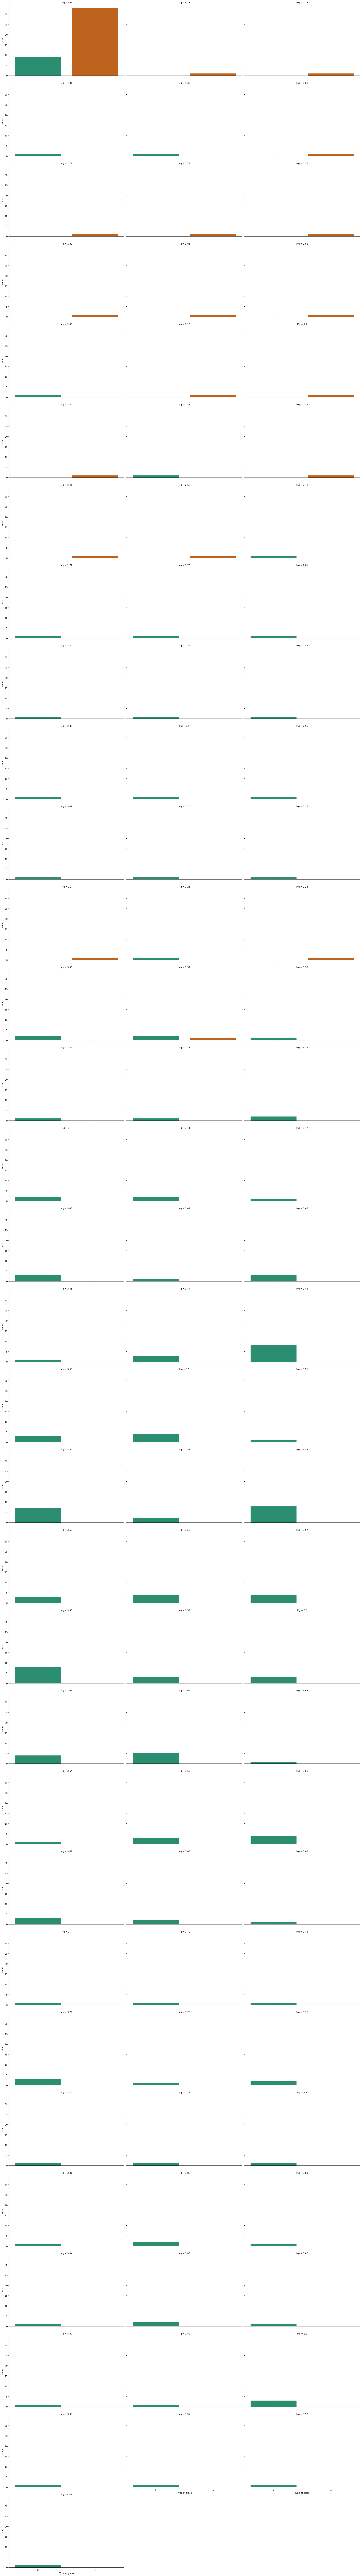

In [65]:
sns.catplot(x= 'Type of glass', col= 'Mg', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

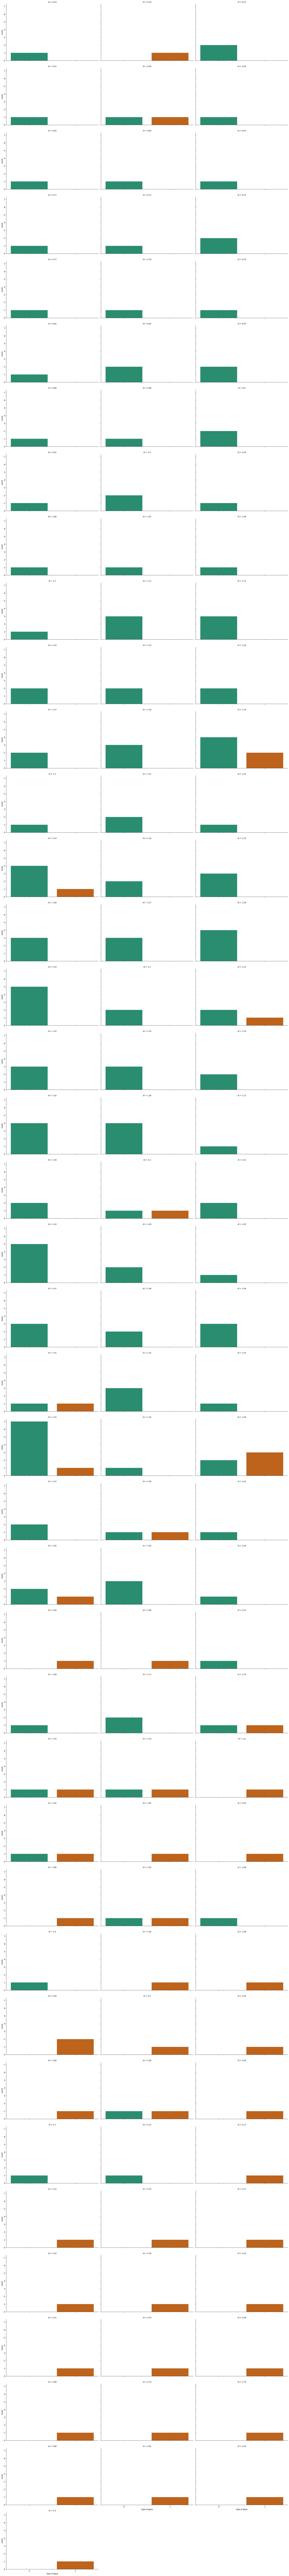

In [66]:
sns.catplot(x= 'Type of glass', col= 'Al', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Most of the non -window glasses have alluminium content of 1.01, wheras window glasses have sodium levels of 1.57.

In [67]:
sns.catplot(x= 'Type of glass', col= 'Si', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)


Most of the window glasses have silicon levels between 71 to 73 and non-window glasses have 73 to 76.

In [68]:
sns.catplot(x= 'Type of glass', col= 'Ca', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)


Most of window glasses have 8-9 levels of calcium have 8.49, 8.89 and non-window glasses have almost 8.7 levels of calcium.

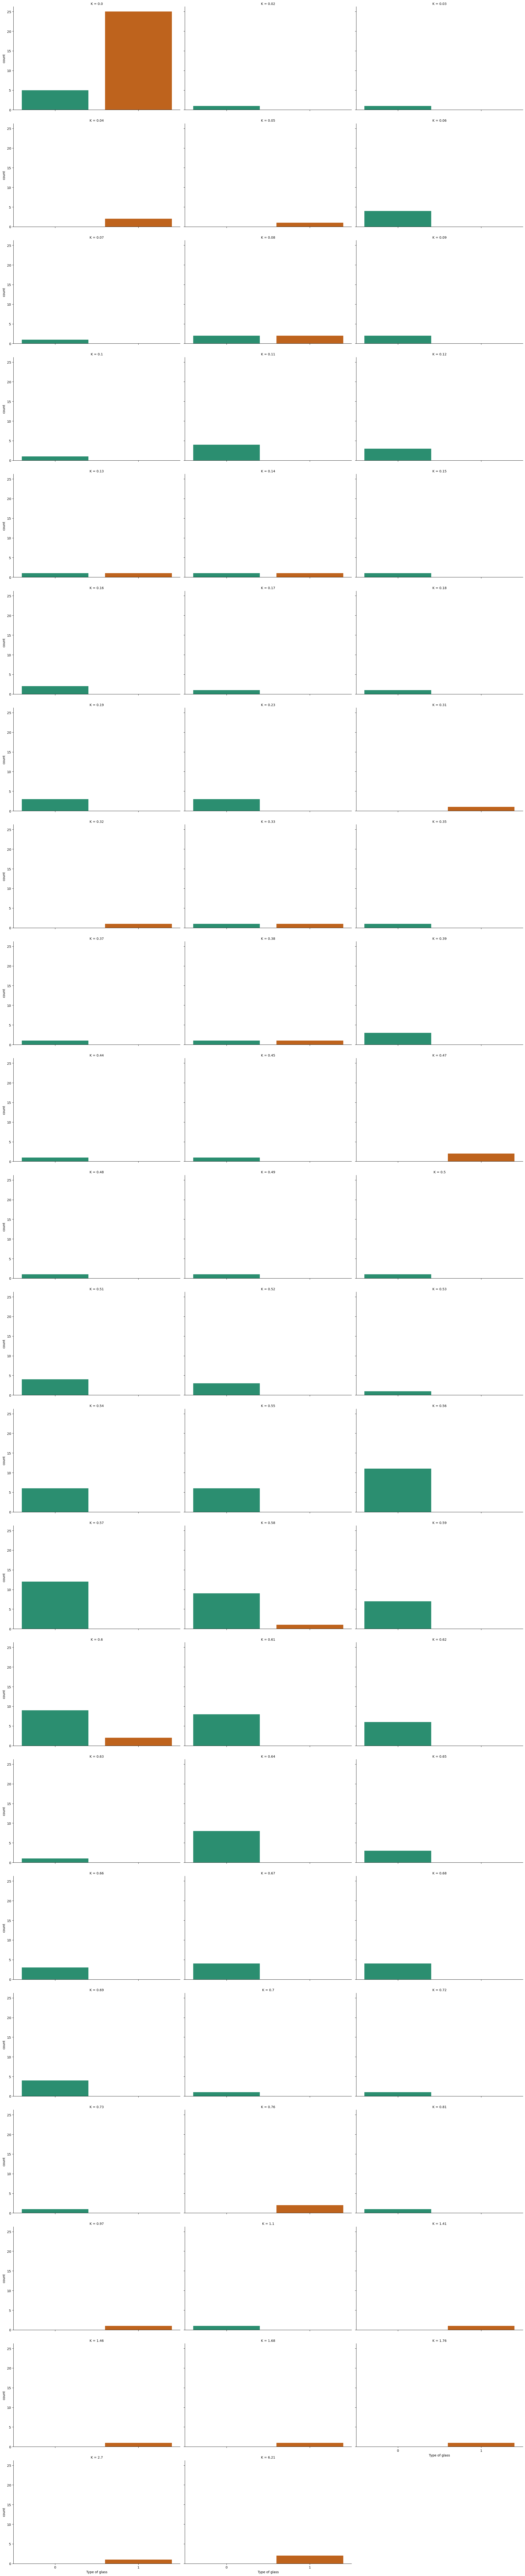

In [69]:
sns.catplot(x= 'Type of glass', col= 'K', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)


0.04 levels of potassium is present in most of the non-window glasses, and 0.59 levels of potassium in window glasses.

In [70]:
sns.catplot(x= 'Type of glass', col= 'Ca', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)


8.07,8.49 calcium is present in the  most of the window glasses, and non-window glasses have 8.89 calcium levels.

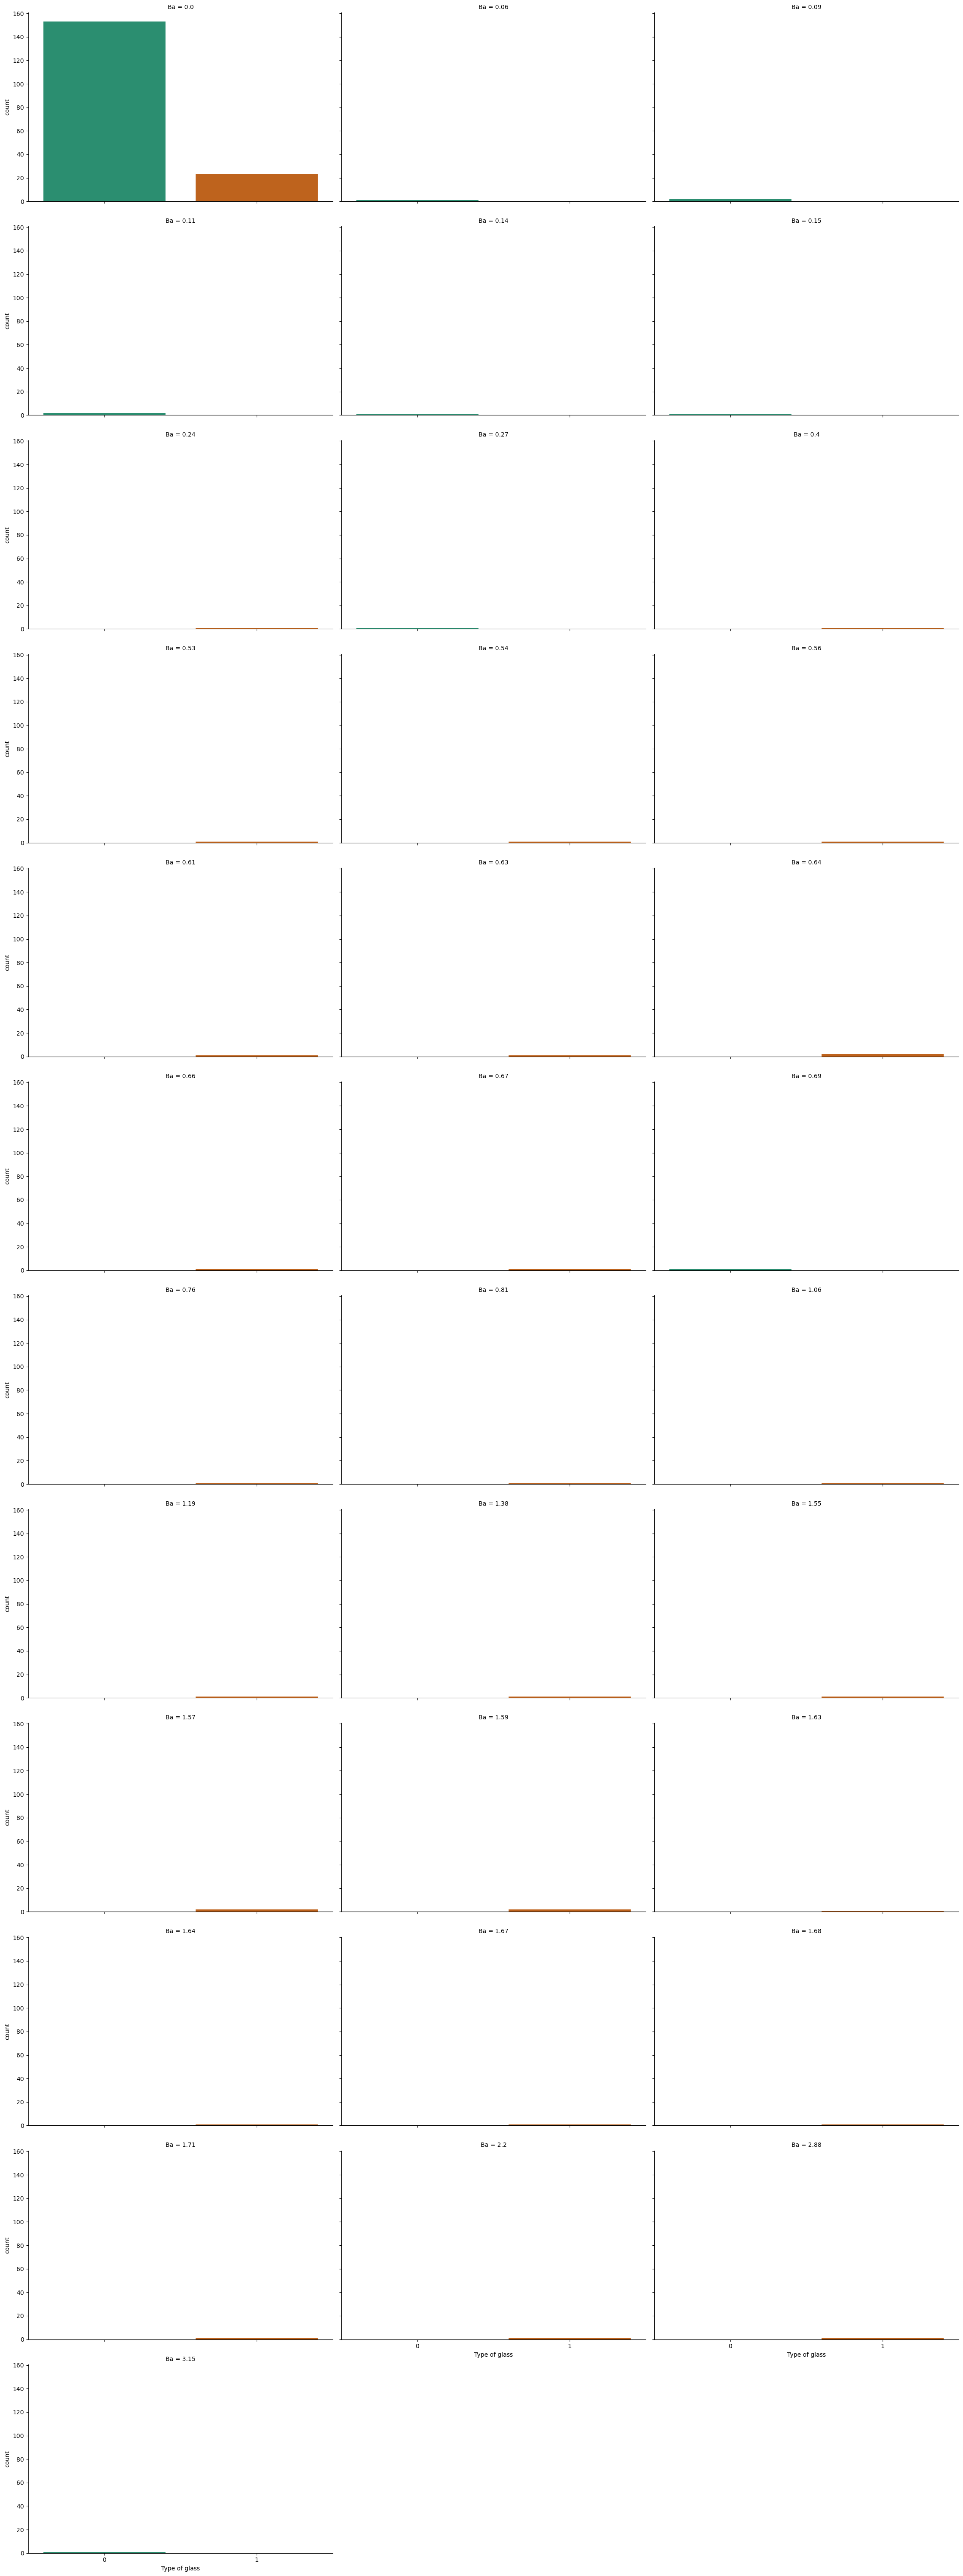

In [73]:
sns.catplot(x= 'Type of glass', col= 'Ba', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)


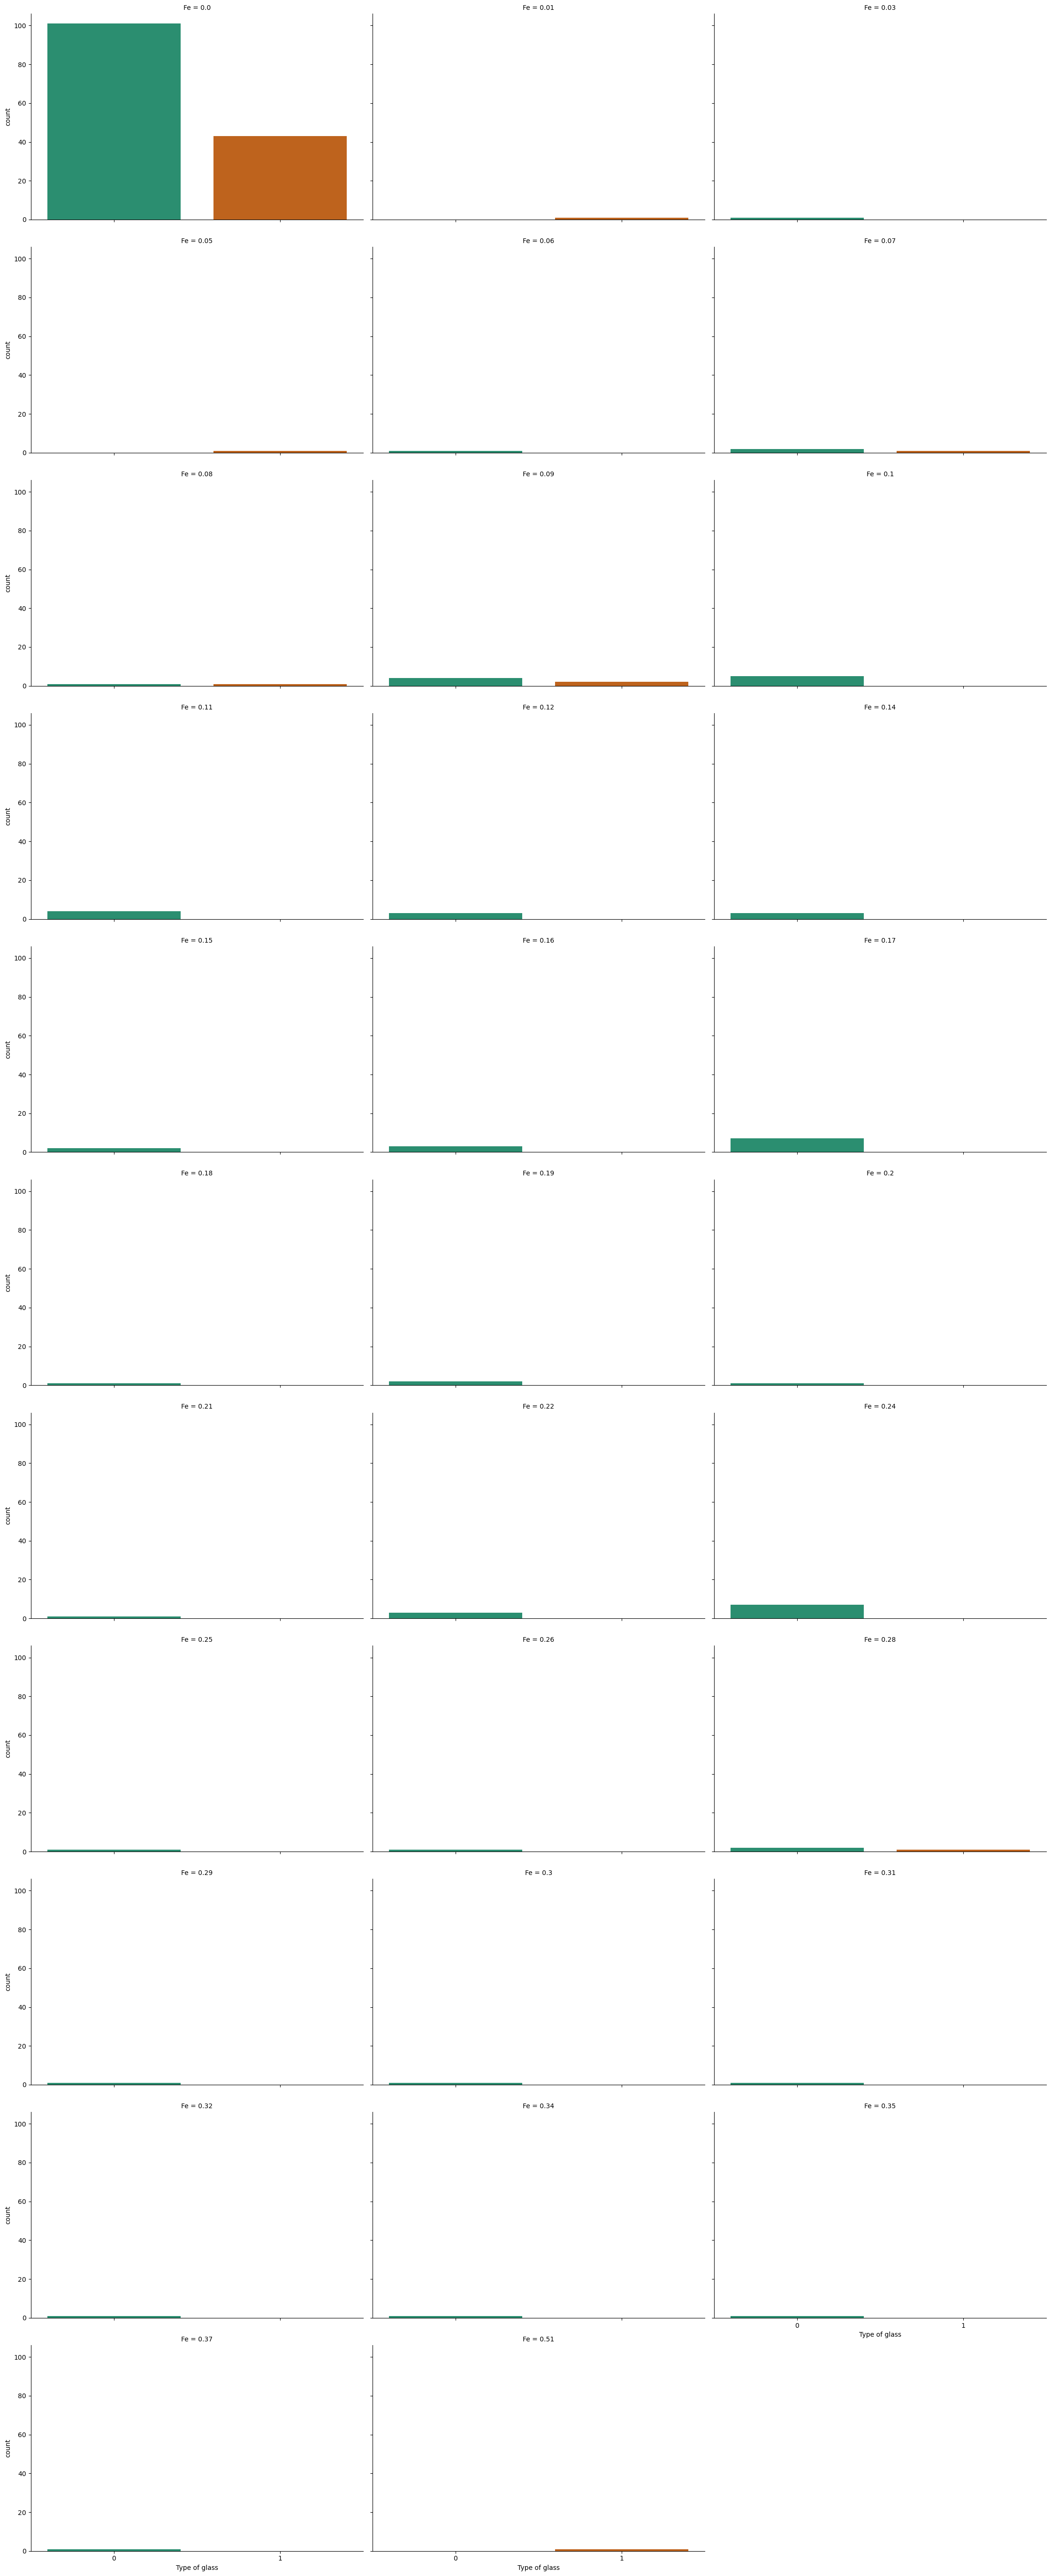

In [74]:
sns.catplot(x= 'Type of glass', col= 'Fe', data = glass_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)


Most of the window and non-window glasses have 0 levels of iron.

Multi-variate analysis

Pair plots

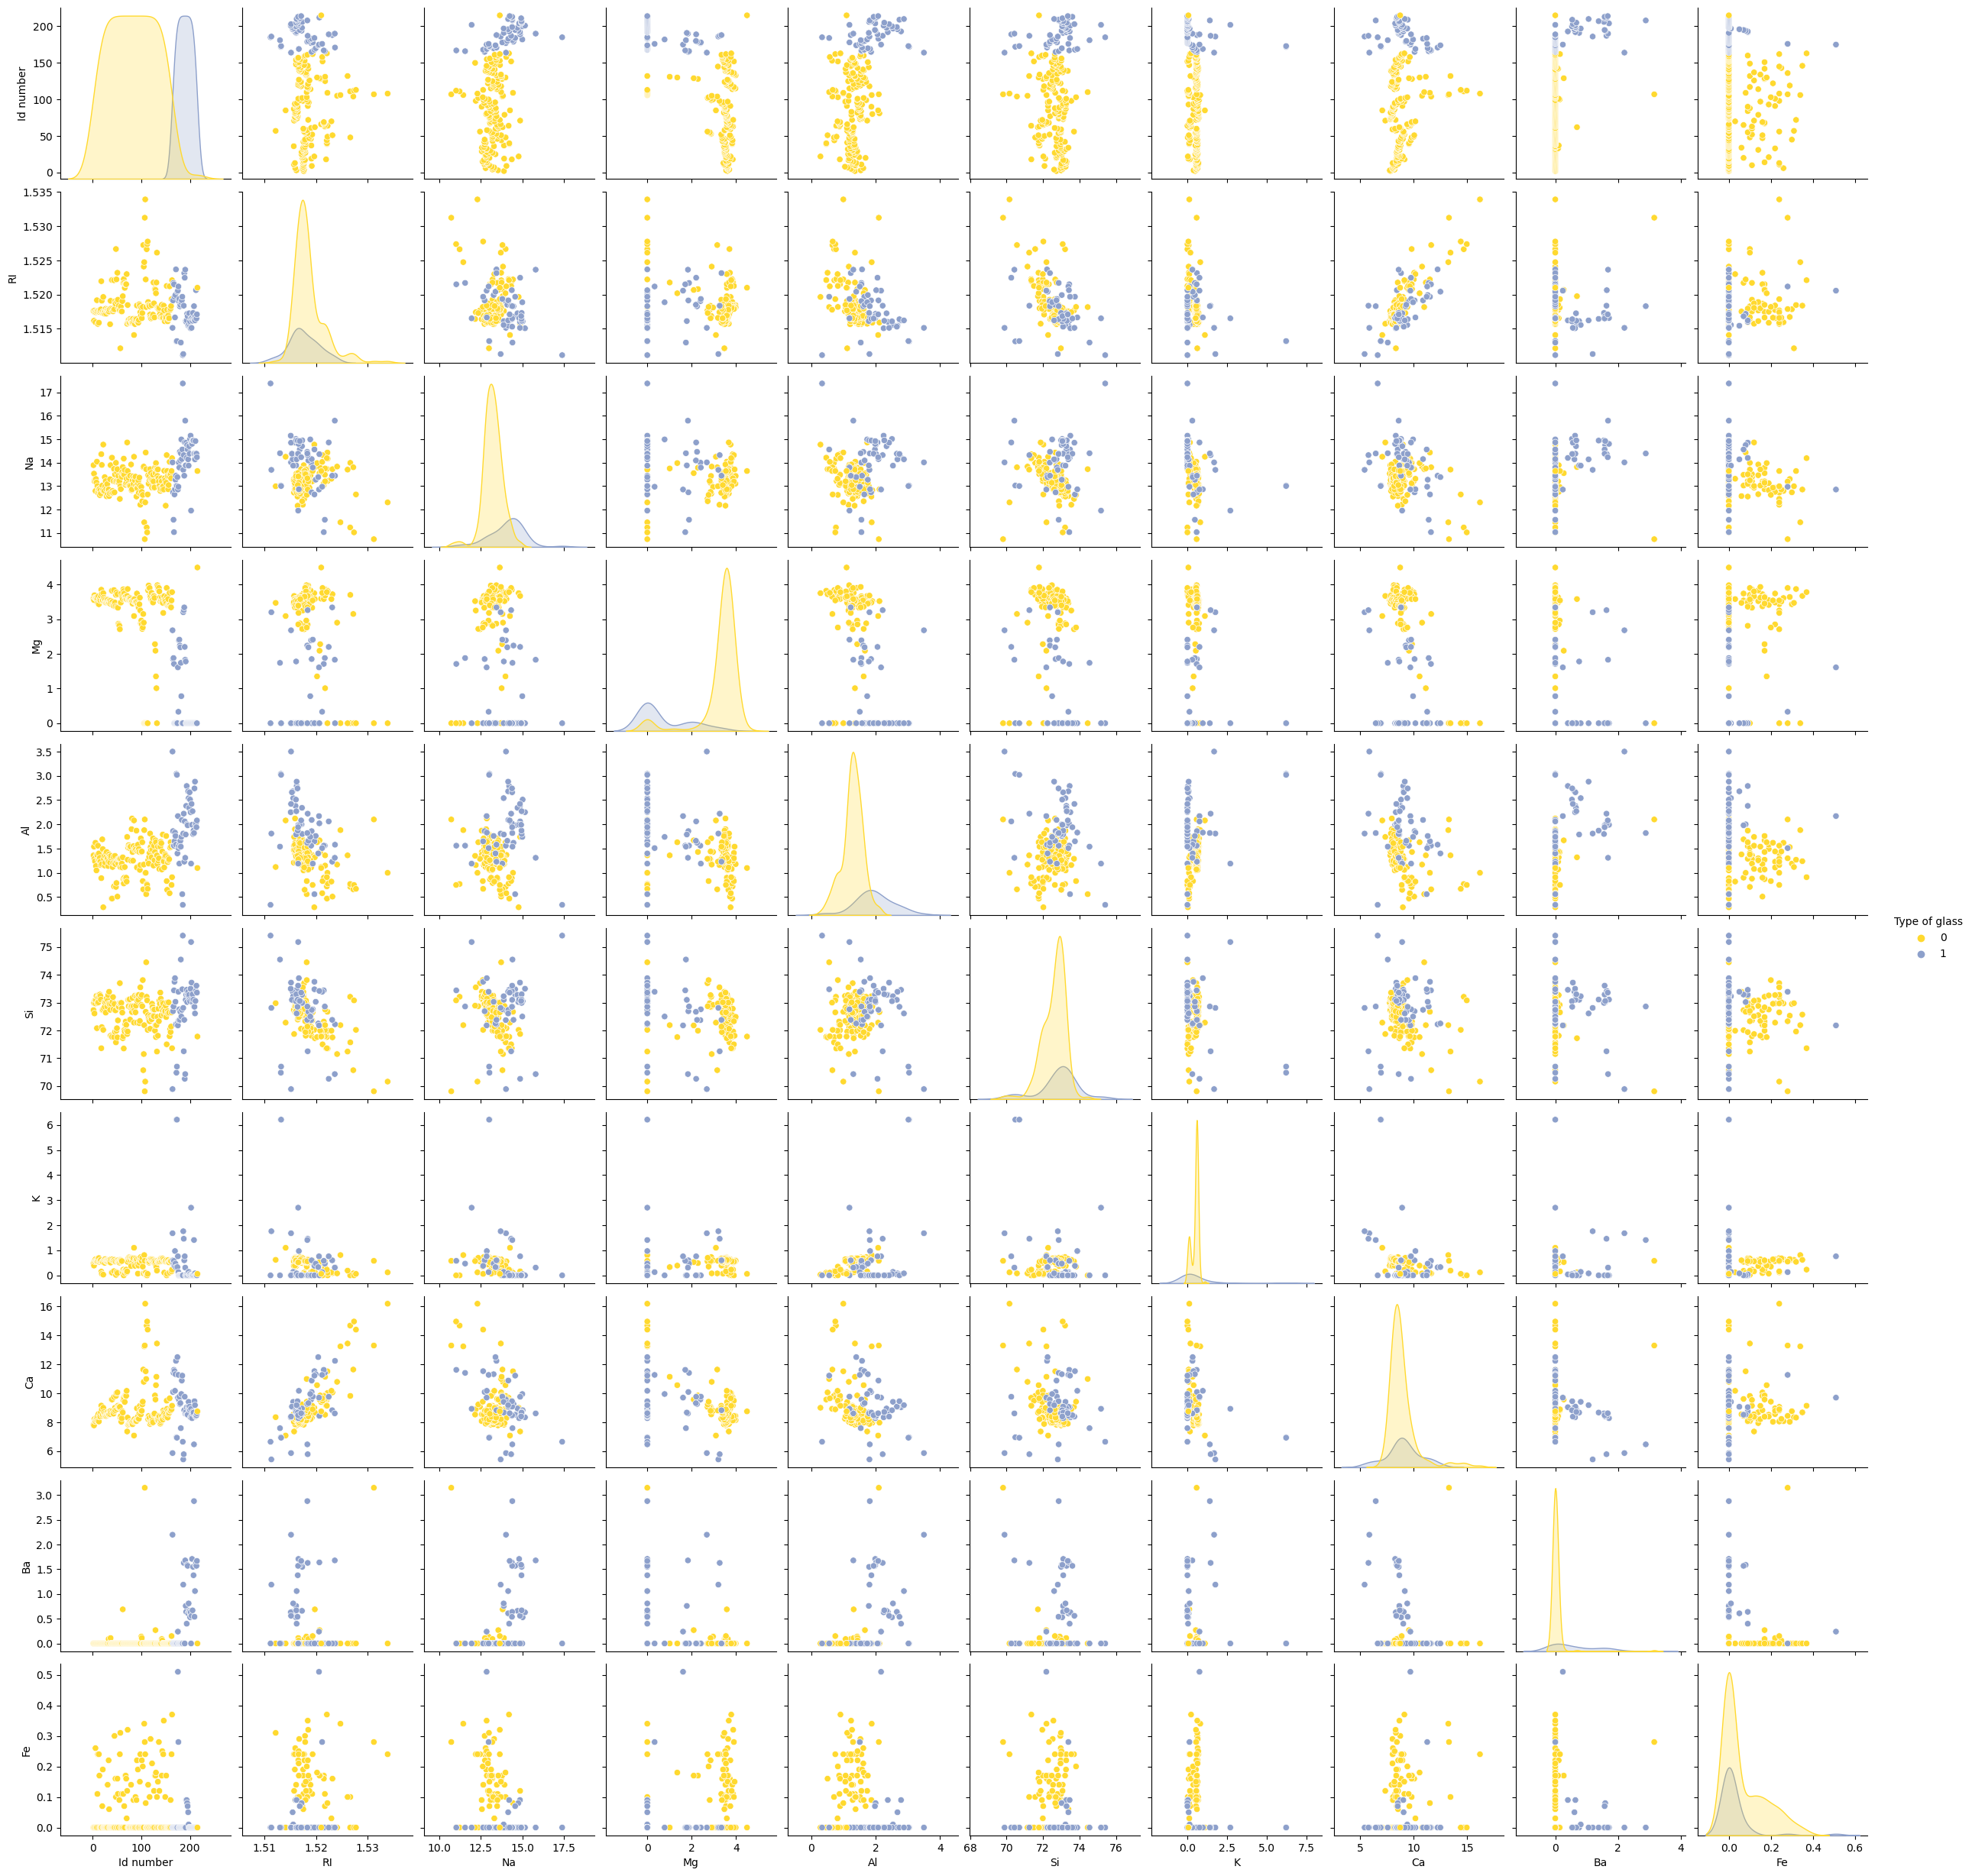

In [75]:
sns.pairplot(glass_data, hue='Type of glass', palette='Set2_r')
plt.show()

The only positive correlation we can see from these plots are that refractive index and calcium. Rest of the plots hsow no correlation at all.

Boxplots

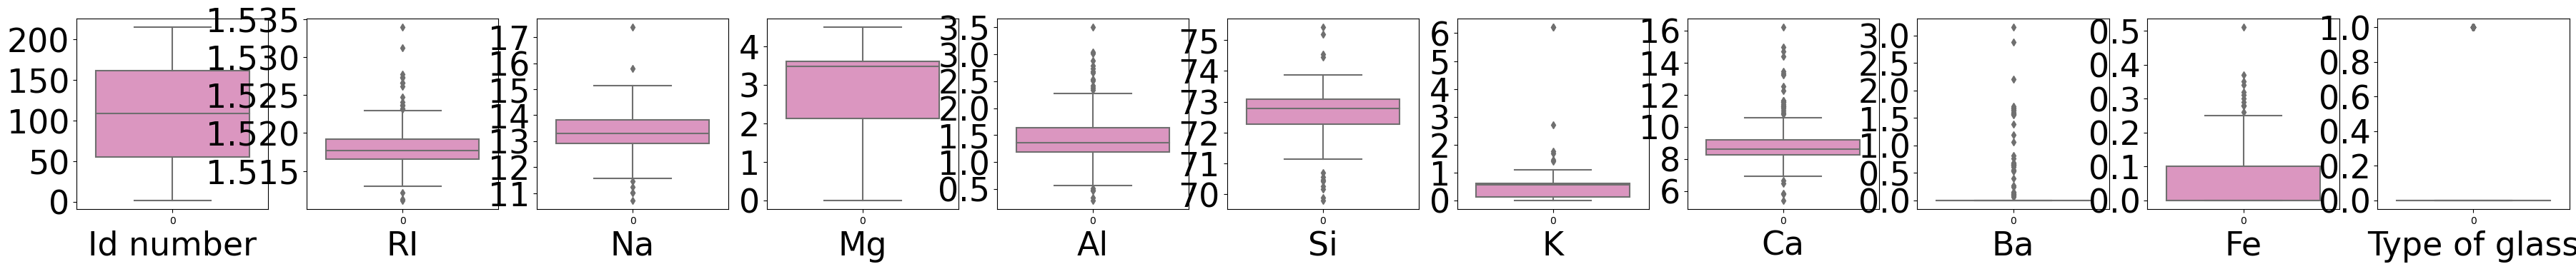

In [76]:
plt.figure(figsize=(45,45),facecolor = "white")
plotnumber=1
for col in glass_data:
    if plotnumber<=12:
        wc=plt.subplot(11,11,plotnumber)
        sns.boxplot(glass_data[col],palette="Set2_r")
        plt.xlabel(col,rotation=0,fontsize = 33)
        plt.yticks(rotation = 0, fontsize = 33)
    plotnumber+=1
plt.show()

Outliers are present in most of the columns other than the id number column.

Now let's check for the skewness in each of the columns.

In [179]:
glass_data.skew()

Id number        0.000000
RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.237086
dtype: float64

Now let's remove the skewness using the cbrt/cube root formula for highly skewed columns.

In [180]:
glass_data['K']=np.cbrt(glass_data['K'])
glass_data['Ca']=np.cbrt(glass_data['Ca'])
glass_data['Ba']=np.cbrt(glass_data['Ba'])
glass_data['Fe']=np.cbrt(glass_data['Fe'])
glass_data['Mg']=np.cbrt(glass_data['Mg'])
glass_data['RI']=np.cbrt(glass_data['RI'])


Now let's again check for skewness.

In [181]:
glass_data.skew()

Id number        0.000000
RI               1.617049
Na               0.454181
Mg              -1.440196
Al               0.907290
Si              -0.730447
K               -0.591896
Ca               1.407358
Ba               2.073007
Fe               0.894683
Type of glass    1.237086
dtype: float64

In [182]:
glass_data['Type of glass']=np.cbrt(glass_data['Type of glass'])

In [183]:
glass_data.skew()

Id number        0.000000
RI               1.617049
Na               0.454181
Mg              -1.440196
Al               0.907290
Si              -0.730447
K               -0.591896
Ca               1.407358
Ba               2.073007
Fe               0.894683
Type of glass    1.237086
dtype: float64

The skewness have been corrected. Now let's look at the distribution of our target column.

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_3300\408332444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass_data['Type of glass'],color="b", kde_kws={"shade":True}, hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


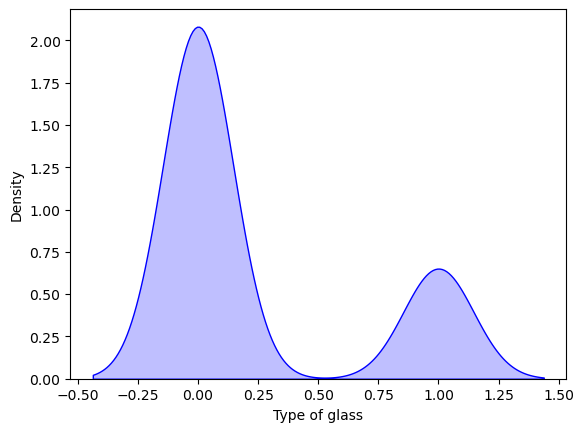

In [82]:
sns.distplot(glass_data['Type of glass'],color="b", kde_kws={"shade":True}, hist=False)
plt.show()

Its highly skewed to window glasses than towards non-window glasses.

Let's encode all the columns into float values using ordinal encoding for our preddiction models.

In [184]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in glass_data.columns:
    if glass_data[i].dtypes=='int64':
        glass_data[i]=OE.fit_transform(glass_data[i].values.reshape(-1,1))
glass_data

Id number        RI     Na        Mg    Al     Si         K        Ca  \
0          0.0  1.149176  13.89  1.532619  1.36  72.73  0.782974  1.985732   
1          1.0  1.148815  13.53  1.525490  1.54  72.99  0.730614  1.981496   
2          2.0  1.149189  13.21  1.545286  1.29  72.61  0.829134  2.018168   
3          3.0  1.149129  13.27  1.535452  1.24  73.08  0.819321  2.005816   
4          4.0  1.148760  12.79  1.534037  1.62  72.97  0.861774  2.005816   
..         ...       ...    ...       ...   ...    ...       ...       ...   
209      209.0  1.148985  14.92  0.000000  1.99  73.06  0.000000  2.032793   
210      210.0  1.149943  14.36  0.000000  2.02  73.42  0.000000  2.036014   
211      211.0  1.148899  14.38  0.000000  1.94  73.61  0.000000  2.039226   
212      212.0  1.149050  14.23  0.000000  2.08  73.36  0.000000  2.050387   
213      213.0  1.150034  13.64  1.649740  1.10  71.78  0.391487  2.060643   

           Ba       Fe  Type of glass  
0    0.000000  0.00000            0.0  
1    0.000000  0.00000            0.0  
2    0.000000  0.00000            0.0  
3    0.000000  0.00000            0.0  
4    0.000000  0.63825            0.0  
..        ...      ...            ...  
209  1.167165  0.00000            1.0  
210  1.179274  0.00000            1.0  
211  1.162251  0.00000            1.0  
212  1.186421  0.00000            1.0  
213  0.000000  0.00000            0.0  

[214 rows x 11 columns]

Now let's check if all the column have converted into float values using the .info() methods.

In [84]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    float64
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    float64
dtypes: float64(11)
memory usage: 18.5 KB


Now let's check for correlation between variables in our dataframe. We will be using the .corr() method.

In [148]:
correlation = glass_data.corr()
correlation

Id number        RI        Na        Mg        Al        Si  \
Id number       1.000000 -0.058229  0.380335 -0.595112  0.478904  0.042987   
RI             -0.058229  1.000000 -0.191810 -0.113648 -0.407587 -0.541953   
Na              0.380335 -0.191810  1.000000 -0.277849  0.156794 -0.069809   
Mg             -0.595112 -0.113648 -0.277849  1.000000 -0.452496 -0.171665   
Al              0.478904 -0.407587  0.156794 -0.452496  1.000000 -0.005524   
Si              0.042987 -0.541953 -0.069809 -0.171665 -0.005524  1.000000   
K              -0.356941 -0.211934 -0.539820  0.442902  0.066251 -0.172056   
Ca              0.078812  0.802869 -0.264986 -0.398712 -0.276597 -0.190635   
Ba              0.516660 -0.092651  0.418626 -0.548170  0.561615 -0.005974   
Fe             -0.106924  0.132621 -0.196921  0.094472 -0.075230 -0.078194   
Type of glass   0.728901 -0.134457  0.452336 -0.702022  0.585928  0.148072   

                      K        Ca        Ba        Fe  Type of glass  
Id number     -0.356941  0.078812  0.516660 -0.106924       0.728901  
RI            -0.211934  0.802869 -0.092651  0.132621      -0.134457  
Na            -0.539820 -0.264986  0.418626 -0.196921       0.452336  
Mg             0.442902 -0.398712 -0.548170  0.094472      -0.702022  
Al             0.066251 -0.276597  0.561615 -0.075230       0.585928  
Si            -0.172056 -0.190635 -0.005974 -0.078194       0.148072  
K              1.000000 -0.352345 -0.350932  0.119291      -0.389353  
Ca            -0.352345  1.000000 -0.148226  0.116880       0.031986  
Ba            -0.350932 -0.148226  1.000000 -0.035721       0.599029  
Fe             0.119291  0.116880 -0.035721  1.000000      -0.220775  
Type of glass -0.389353  0.031986  0.599029 -0.220775       1.000000

Let's visualise it using the heatmap method to see the coorelations.

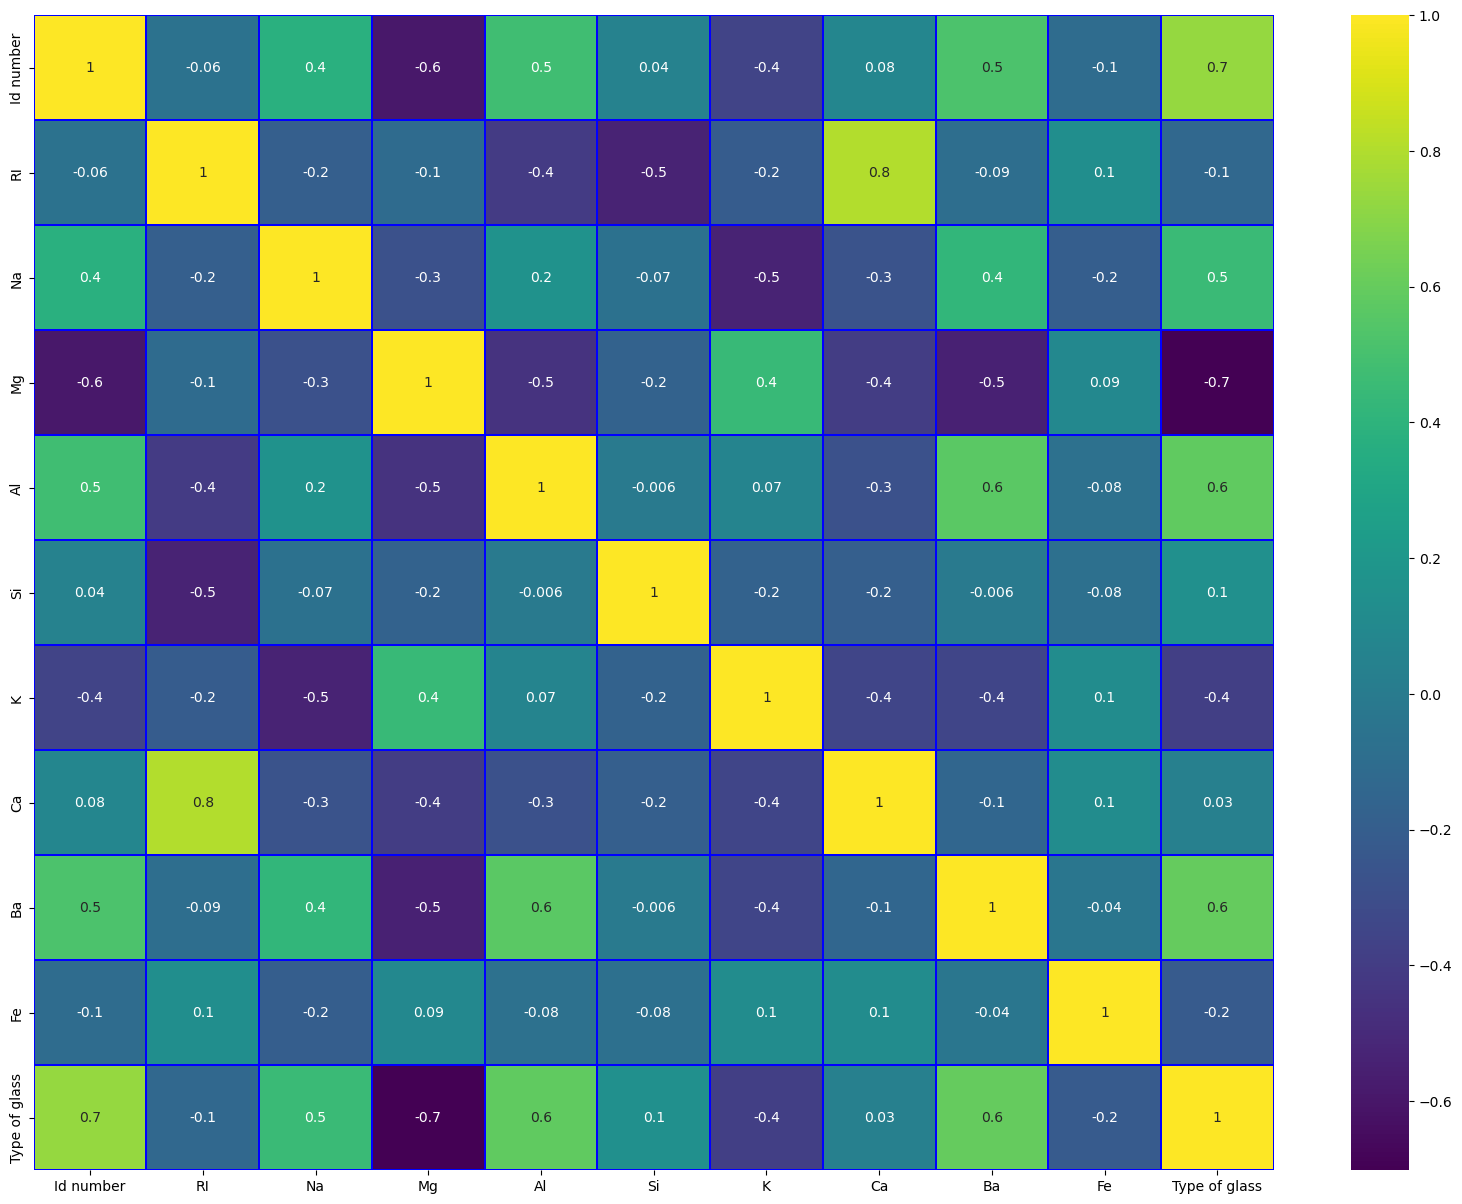

In [86]:
plt.figure(figsize = (20,15))
sns.heatmap(glass_data.corr(), linewidths = 0.1, fmt = ".1g", linecolor= "blue", annot=True, cmap= "viridis")
plt.yticks(rotation=90);
plt.show()

1) Mg have highly negative correlation with the type of glass wheras ba,id number, na,al, and ba have positive correlation with the type of glass.
2) K have medial correlation with the type of glass and negative correlation with ba, ca and na.
3) Si and Al have low correlation with refractive index.
4) Al, Na and Id number have positive correlation with Ba.
5) Ca have positive correlation with refractive indexes, wheras negative correlation with potassium, silicon, magnesium, alluminium and sodium. 

Now let's check the correlation of different input variables with the target column.

In [149]:
correlation['Type of glass'].sort_values(ascending = False)

Type of glass    1.000000
Id number        0.728901
Ba               0.599029
Al               0.585928
Na               0.452336
Si               0.148072
Ca               0.031986
RI              -0.134457
Fe              -0.220775
K               -0.389353
Mg              -0.702022
Name: Type of glass, dtype: float64

Let's 's visualise them using bar plots.

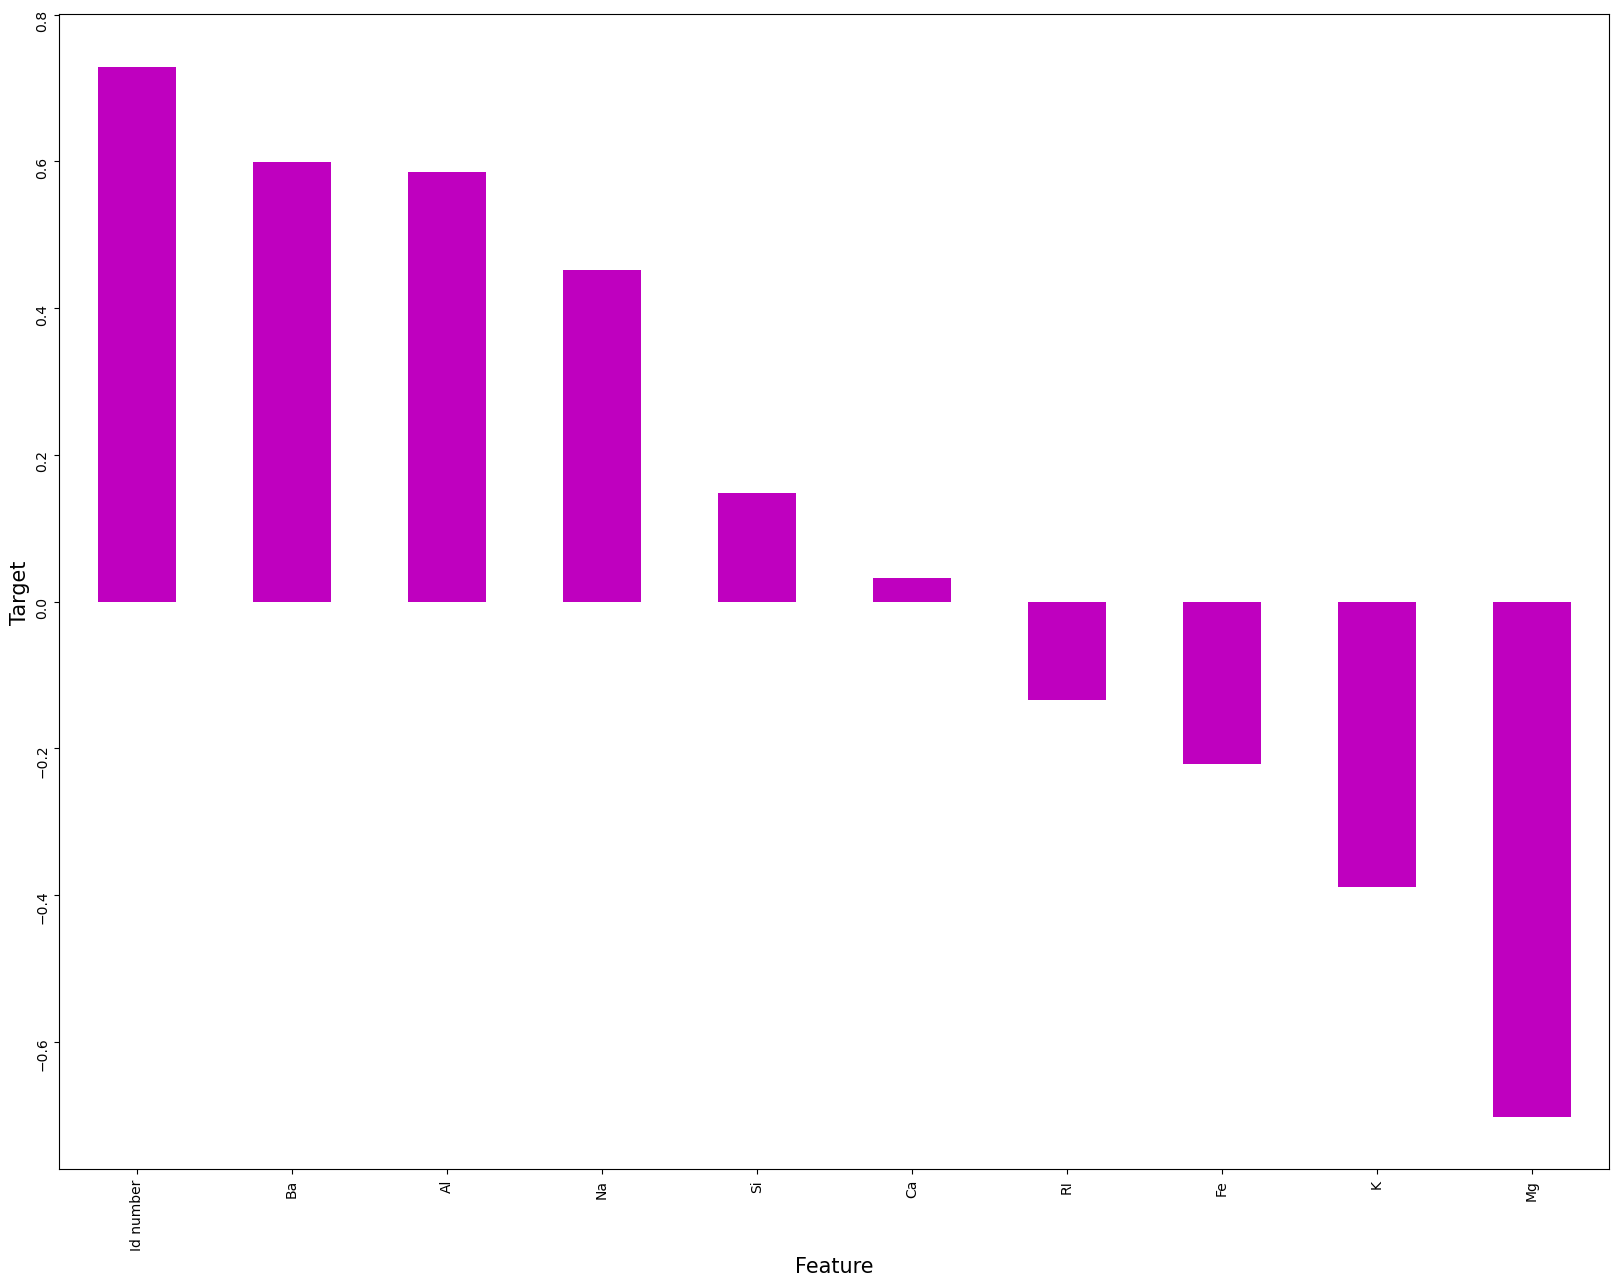

In [150]:
plt.figure(figsize = (20,15))
correlation['Type of glass'].sort_values(ascending=False).drop(['Type of glass']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.yticks(rotation=90);
plt.show()

We will be removing values with low correlation later after standard scaling. Let's first declare the x and y variables. 

In [185]:
x = glass_data.drop("Type of glass", axis=1)
y = glass_data["Type of glass"]

Now let's scale the input data by processing it with standard scaler

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Id number        RI        Na        Mg        Al        Si         K  \
0    -1.723976 -0.248977  0.591817  0.563835 -0.170460  0.102319  0.346205   
1    -1.707788 -0.721771  0.149933  0.551954  0.190912  0.438787  0.188105   
2    -1.691601 -0.232451 -0.242853  0.584946 -0.310994 -0.052974  0.485589   
3    -1.675413 -0.311778 -0.169205  0.568556 -0.411375  0.555256  0.455958   
4    -1.659226 -0.794534 -0.758384  0.566198  0.351521  0.412905  0.584144   
..         ...       ...       ...       ...       ...       ...       ...   
209   1.659226 -0.500215  1.856097 -1.990475  1.094342  0.529374 -2.018006   
210   1.675413  0.755138  1.168721 -1.990475  1.154570  0.995252 -2.018006   
211   1.691601 -0.612638  1.193270 -1.990475  0.993960  1.241133 -2.018006   
212   1.707788 -0.414255  1.009152 -1.990475  1.275028  0.917606 -2.018006   
213   1.723976  0.873958  0.284953  0.759032 -0.692442 -1.127082 -0.835901   

           Ca        Ba        Fe  
0   -0.841573 -0.439469 -0.679381  
1   -0.883072 -0.439469 -0.679381  
2   -0.523791 -0.439469 -0.679381  
3   -0.644800 -0.439469 -0.679381  
4   -0.644800 -0.439469  1.774552  
..        ...       ...       ...  
209 -0.380508  2.716835 -0.679381  
210 -0.348946  2.749579 -0.679381  
211 -0.317483  2.703545 -0.679381  
212 -0.208137  2.768907 -0.679381  
213 -0.107657 -0.439469 -0.679381  

[214 rows x 10 columns]

Now let;s check for variation inflation factors for each of these columns.

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values   Features
0    1.889036  Id number
1    8.456321         RI
2    4.140002         Na
3    5.407162         Mg
4    3.616081         Al
5    3.930536         Si
6    3.930053          K
7   10.158517         Ca
8    3.273344         Ba
9    1.092590         Fe

Now let's delete columns with low correlation and high variation inflation factor.

In [188]:
columns_with_low_corelation_and_high_VIF = ['Ca','Id number']
glass_data = glass_data.drop(columns=columns_with_low_corelation_and_high_VIF)

Now let's check our new dataframe.

In [189]:
glass_data

RI     Na        Mg    Al     Si         K        Ba       Fe  \
0    1.149176  13.89  1.532619  1.36  72.73  0.782974  0.000000  0.00000   
1    1.148815  13.53  1.525490  1.54  72.99  0.730614  0.000000  0.00000   
2    1.149189  13.21  1.545286  1.29  72.61  0.829134  0.000000  0.00000   
3    1.149129  13.27  1.535452  1.24  73.08  0.819321  0.000000  0.00000   
4    1.148760  12.79  1.534037  1.62  72.97  0.861774  0.000000  0.63825   
..        ...    ...       ...   ...    ...       ...       ...      ...   
209  1.148985  14.92  0.000000  1.99  73.06  0.000000  1.167165  0.00000   
210  1.149943  14.36  0.000000  2.02  73.42  0.000000  1.179274  0.00000   
211  1.148899  14.38  0.000000  1.94  73.61  0.000000  1.162251  0.00000   
212  1.149050  14.23  0.000000  2.08  73.36  0.000000  1.186421  0.00000   
213  1.150034  13.64  1.649740  1.10  71.78  0.391487  0.000000  0.00000   

     Type of glass  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
..             ...  
209            1.0  
210            1.0  
211            1.0  
212            1.0  
213            0.0  

[214 rows x 9 columns]

Now let's again declare the x and y variables from our new dataframe. We will be repeating the above steps and checking the vif values again.

In [190]:
x = glass_data.drop("Type of glass", axis=1)
y = glass_data["Type of glass"]

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

RI        Na        Mg        Al        Si         K        Ba  \
0   -0.248977  0.591817  0.563835 -0.170460  0.102319  0.346205 -0.439469   
1   -0.721771  0.149933  0.551954  0.190912  0.438787  0.188105 -0.439469   
2   -0.232451 -0.242853  0.584946 -0.310994 -0.052974  0.485589 -0.439469   
3   -0.311778 -0.169205  0.568556 -0.411375  0.555256  0.455958 -0.439469   
4   -0.794534 -0.758384  0.566198  0.351521  0.412905  0.584144 -0.439469   
..        ...       ...       ...       ...       ...       ...       ...   
209 -0.500215  1.856097 -1.990475  1.094342  0.529374 -2.018006  2.716835   
210  0.755138  1.168721 -1.990475  1.154570  0.995252 -2.018006  2.749579   
211 -0.612638  1.193270 -1.990475  0.993960  1.241133 -2.018006  2.703545   
212 -0.414255  1.009152 -1.990475  1.275028  0.917606 -2.018006  2.768907   
213  0.873958  0.284953  0.759032 -0.692442 -1.127082 -0.835901 -0.439469   

           Fe  
0   -0.679381  
1   -0.679381  
2   -0.679381  
3   -0.679381  
4    1.774552  
..        ...  
209 -0.679381  
210 -0.679381  
211 -0.679381  
212 -0.679381  
213 -0.679381  

[214 rows x 8 columns]

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values Features
0    5.506237       RI
1    2.966316       Na
2    2.905974       Mg
3    3.460192       Al
4    3.893815       Si
5    2.789449        K
6    2.097025       Ba
7    1.067792       Fe

Now that the VIF  values are corrected, let's check the value counts of our target variable 'Type of Glass'.

In [193]:
y.value_counts()

0.0    163
1.0     51
Name: Type of glass, dtype: int64

It's imbalanced, thus we need to balance it using SMOTE analysis.

In [194]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

Now let's check the new y value counts again.

In [195]:
y1.value_counts()

0.0    163
1.0    163
Name: Type of glass, dtype: int64

Now that the value counts are balanced , let's check the z-score and remove the outliers from the dataframe.

In [197]:
from scipy.stats import zscore
out_features=glass_data[['RI','Na','Mg','Ba','K','Fe','Si','Al']]
z=np.abs(zscore(out_features))
z

RI        Na        Mg        Ba         K        Fe        Si  \
0    0.248977  0.591817  0.563835  0.439469  0.346205  0.679381  0.102319   
1    0.721771  0.149933  0.551954  0.439469  0.188105  0.679381  0.438787   
2    0.232451  0.242853  0.584946  0.439469  0.485589  0.679381  0.052974   
3    0.311778  0.169205  0.568556  0.439469  0.455958  0.679381  0.555256   
4    0.794534  0.758384  0.566198  0.439469  0.584144  1.774552  0.412905   
..        ...       ...       ...       ...       ...       ...       ...   
209  0.500215  1.856097  1.990475  2.716835  2.018006  0.679381  0.529374   
210  0.755138  1.168721  1.990475  2.749579  2.018006  0.679381  0.995252   
211  0.612638  1.193270  1.990475  2.703545  2.018006  0.679381  1.241133   
212  0.414255  1.009152  1.990475  2.768907  2.018006  0.679381  0.917606   
213  0.873958  0.284953  0.759032  0.439469  0.835901  0.679381  1.127082   

           Al  
0    0.170460  
1    0.190912  
2    0.310994  
3    0.411375  
4    0.351521  
..        ...  
209  1.094342  
210  1.154570  
211  0.993960  
212  1.275028  
213  0.692442  

[214 rows x 8 columns]

Let's check how many values have z-score above 3/-3.

In [198]:
np.where(z>3)

(array([105, 105, 105, 105, 106, 106, 111, 162, 162, 162, 170, 170, 171,
        171, 183, 183, 187, 200, 206], dtype=int64),
 array([0, 1, 3, 6, 0, 6, 0, 3, 6, 7, 4, 7, 4, 7, 1, 6, 6, 6, 3],
       dtype=int64))

Now let's remove all the values with z-score above 3 and check the new dimensions of our dataframe.

In [199]:
glass_data_new=glass_data[(z<3).all(axis=1)]
glass_data_new.shape

(204, 9)

Let's check for the data loss percentage after removing the outliers.

In [200]:
data_loss_percentage = ((glass_data.shape[0] - glass_data_new.shape[0]) / glass_data.shape[0]) * 100
print("Data Loss Percentage:", data_loss_percentage)

Data Loss Percentage: 4.672897196261682


The data loss percentage is under the acceptable levels. Now let's check for the new value counts after removing the outliers.

In [201]:
x = glass_data_new.drop("Type of glass", axis=1)
y = glass_data_new["Type of glass"]

In [202]:
y.value_counts()

0.0    160
1.0     44
Name: Type of glass, dtype: int64

The new value counts of our target variable have decreased and needs to be again balanced using SMOTE analysis.

In [203]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [204]:
y1.value_counts()

0.0    160
1.0    160
Name: Type of glass, dtype: int64

Now that the value counts have been balanced, we will moving towards the prediction part of the project, and check for the best accuracy score and the best random state using the random forest classifier in order for us to usemutiple classification models later on. We will be taking a 70-30 split.

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccuracy = 0
maxrandomstate = 0
for i in range(1,200):
      x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=i)
      RFC = RandomForestClassifier()
      RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxaccuracy:
    maxaccuracy=acc
    maxrandomstate=i
print("the best accuracy score",maxaccuracy,"at the following random state",maxrandomstate)

the best accuracy score 0.96875 at the following random state 199


So using the random forest classifier, we found out that the best accuracy score is 0.96875 at the random state of 199.

Now let's train the dataframe for applying the various classification models with a test size of 30 percent of the dataframe.

In [206]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=maxrandomstate)

Now that we have have trained the model, let's import the packages and libararies in order for us to do look at the best classification model for our dataframe. We will be using RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, Support Vector Classifier, and LogisticRegression.

In [216]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

Random Forest classifier has an accuracy score of 0.96875 with a precision of .96 to .98, recall of .96 to .98 and f1-score of .97. 

In [208]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.96875
[[45  1]
 [ 2 48]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        46
         1.0       0.98      0.96      0.97        50

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



Logistic Regression has an accuracy score of 0.8870967741935484, with precision of .89, recall of .97 to .98 and f1 score of .70 to .93.

In [227]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(x_train,y_train)
predLogReg=LogReg.predict(x_test)
print(accuracy_score(y_test, predLogReg))
print(confusion_matrix(y_test,predLogReg))
print(classification_report(y_test,predLogReg))

0.8870967741935484
[[47  1]
 [ 6  8]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93        48
         1.0       0.89      0.57      0.70        14

    accuracy                           0.89        62
   macro avg       0.89      0.78      0.81        62
weighted avg       0.89      0.89      0.88        62



Gradient Boosting Classifier has ana ccuracy score of 0.947916666666666 with a precision of .90 to 1.00, recall of .90 to 1.00 and f1 score to .95

In [210]:
GradBoos = GradientBoostingClassifier()
GradBoos.fit(x_train,y_train)
predGradBoos=GradBoos.predict(x_test)
print(accuracy_score(y_test, predGradBoos))
print(confusion_matrix(y_test,predGradBoos))
print(classification_report(y_test,predGradBoos))

0.9479166666666666
[[46  0]
 [ 5 45]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        46
         1.0       1.00      0.90      0.95        50

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



Bagging Classifier has an accuracy score of 0.958333333333, with a precision score of .94 to .98, recall of .94 to .98, and f1 score of .96.

In [211]:
BagClass = BaggingClassifier()
BagClass.fit(x_train,y_train)
predBagClass=BagClass.predict(x_test)
print(accuracy_score(y_test, predBagClass))
print(confusion_matrix(y_test,predBagClass))
print(classification_report(y_test,predBagClass))

0.9583333333333334
[[45  1]
 [ 3 47]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        46
         1.0       0.98      0.94      0.96        50

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



Extra Trees Classifier has an accuracy score 0.97916666666, with a precision of .98, recall of .98 and f1 score of .98,

In [212]:
Extrees = ExtraTreesClassifier()
Extrees.fit(x_train,y_train)
predExtrees=Extrees.predict(x_test)
print(accuracy_score(y_test, predExtrees))
print(confusion_matrix(y_test,predExtrees))
print(classification_report(y_test,predExtrees))

0.9791666666666666
[[45  1]
 [ 1 49]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        46
         1.0       0.98      0.98      0.98        50

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



Support Vector Classifier has an accuracy score of 0.479166, with a precision of .48 to 1.0, recall of 0.0 to 1.0 and f1 score from 0.00 to 0.65.

In [217]:
SVC = SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test, predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC,zero_division=1))

0.4791666666666667
[[46  0]
 [50  0]]
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65        46
         1.0       1.00      0.00      0.00        50

    accuracy                           0.48        96
   macro avg       0.74      0.50      0.32        96
weighted avg       0.75      0.48      0.31        96



Ada Boost Classifier has an accuracy score of 0.96875, with a precision score of .96 to .98, recall of .96 to .98 and f1 score of .97.

In [218]:
AdaBoos = AdaBoostClassifier()
AdaBoos.fit(x_train,y_train)
Adapred=AdaBoos.predict(x_test)
print(accuracy_score(y_test, Adapred))
print(confusion_matrix(y_test,Adapred))
print(classification_report(y_test,Adapred))

0.96875
[[45  1]
 [ 2 48]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        46
         1.0       0.98      0.96      0.97        50

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



So after applying multiple classification models, we have to check for cross-validation scores for each of the classification model to find the best classifier among them all.

In [ ]:
Cross validation scores. 

Let's start with logistic regression r2 scores, mse and at random state - 42

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)
LogRegmodel = LogisticRegression()
LogRegmodel.fit(x_train, y_train)
true_values = y_test
predicted_values = LogRegmodel.predict(x_test)

In [221]:
from sklearn.metrics import r2_score
predicted_values = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0]
true_values = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
r2 = r2_score(true_values, predicted_values)
print("R2 Score:", r2)

R2 Score: -0.09375


In [220]:
predicted_values

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

We got a r2 score of -0.09375 using logistic regression model

Extra tree classifier has a mean score of 0.858536 and standard deviation of 0.0822.

In [222]:
X = x
y = y
classifier = ExtraTreesClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.7804878  0.80487805 0.90243902 0.80487805 1.        ]
Mean Score: 0.8585365853658538
Standard Deviation: 0.08220633925050105


Bagging classifier has a mean score of 0.8634146 and standard deviation of 0.088075.

In [223]:
X = x
y = y
classifier = BaggingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.7804878  0.87804878 0.90243902 0.75609756 1.        ]
Mean Score: 0.8634146341463416
Standard Deviation: 0.08807546383057457


Gradient Boosting Classifier has a mean score of 0.853658 and standard deviation of 0.1011533.

In [224]:
X = x
y = y
classifier = GradientBoostingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.7804878  0.87804878 0.90243902 0.70731707 1.        ]
Mean Score: 0.853658536585366
Standard Deviation: 0.10115337245525718


Random Forest Classifier has a mean score of 0.84878048 and a standard deviation of 0.0904743.

In [225]:
X = x
y = y
classifier = RandomForestClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.7804878  0.80487805 0.90243902 0.75609756 1.        ]
Mean Score: 0.8487804878048781
Standard Deviation: 0.09047432678532392


Logistic Regression has a mean score 0.2312 and a standard deviation of 0.4555555.

In [229]:
X = x
y = y
classifier = LogisticRegression(max_iter=1000)
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [-0.28125    -0.13888889  0.43055556  0.14583333  1.        ]
Mean Score: 0.23125
Standard Deviation: 0.45555555555555555


Support Vector Classifier has a mean score 0.784390 and standard deviation of 0.0078048.

In [230]:
from sklearn.svm import SVC
X = x
y = y
classifier = SVC()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.7804878 0.7804878 0.7804878 0.7804878 0.8      ]
Mean Score: 0.784390243902439
Standard Deviation: 0.007804878048780495


In [ ]:
AdaBoost Classifier has a mean score of 0.85853658 and a standard deviation of 0.09047432.

In [231]:
X = x
y = y
classifier = AdaBoostClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.80487805 0.80487805 0.92682927 0.75609756 1.        ]
Mean Score: 0.8585365853658538
Standard Deviation: 0.09047432678532392


After analysis, we have found that the least difference between r2 scores and predicted scores by the model, bagging classifier stands out as the best with 0.0899.

Hyper parameter tuning

We will be checking the best parameters from n_estimators,max_samples,max_features, bootstrap, random_state and n_jobs for bagging classifier.

In [239]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [50, 100, 200, 300],'max_samples': [0.6, 0.7, 0.8],'max_features': [0.6, 0.7, 0.8],'bootstrap': [True],'random_state': [10, 50, 1000],'n_jobs': [-2, -1, 1]}

In [240]:
GSCV=GridSearchCV(BaggingClassifier(),parameters,cv=5)

In [241]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True], 'max_features': [0.6, 0.7, 0.8],
                         'max_samples': [0.6, 0.7, 0.8],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

Now let's check for the best parameters for our selected model.

In [242]:
GSCV.best_params_

{'bootstrap': True,
 'max_features': 0.6,
 'max_samples': 0.7,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

Now let's use this best parameters to hyper tune our selected model and check for the accuracy score.

In [246]:
Selected_model = BaggingClassifier(bootstrap=True,max_features= 0.6,max_samples= 0.7,n_estimators= 200,n_jobs= -2,random_state= 1000)
Selected_model.fit(x_train,y_train)
pred = Selected_model.predict(x_test)
accuracy= accuracy_score(y_test,pred)
print(accuracy*100)

93.54838709677419


Our accuracy score is at 93.54838 percent.

ROC-AUC Scores.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


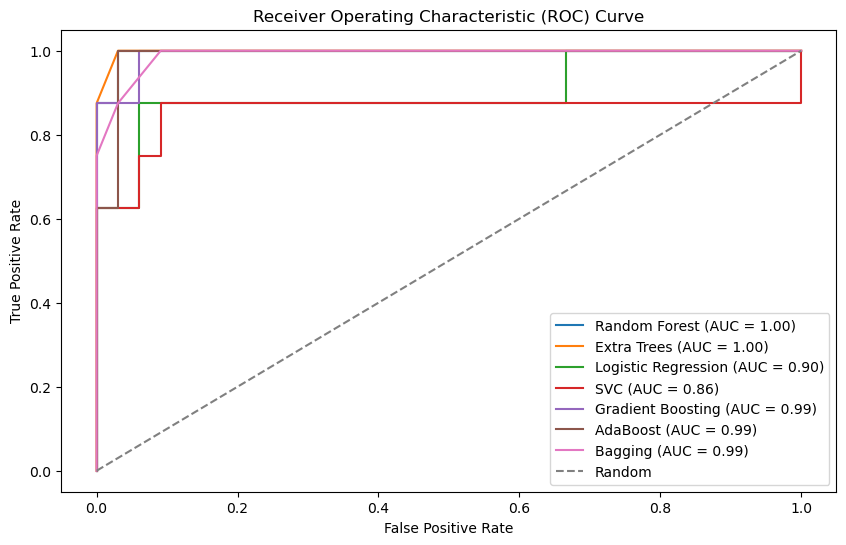

Random Forest: ROC AUC = 1.00
Extra Trees: ROC AUC = 1.00
Logistic Regression: ROC AUC = 0.90
SVC: ROC AUC = 0.86
Gradient Boosting: ROC AUC = 0.99
AdaBoost: ROC AUC = 0.99
Bagging: ROC AUC = 0.99


In [250]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("SVC", SVC(probability=True)),  
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Bagging", BaggingClassifier())
]


roc_auc_scores = {}


plt.figure(figsize=(10, 6))
for classifiername, classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_pred_probability = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
    roc_auc = roc_auc_score(y_test, y_pred_probability)
    roc_auc_scores[classifiername] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{classifiername} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


for name, roc_auc in roc_auc_scores.items():
    print(f'{name}: ROC AUC = {roc_auc:.2f}')

We can see that random forest classifier and extra tree classifier are overfitting, and bagging classifier is the best with .99 right next to adaboost and gradient boost.

Let's save our selected model using joblib method.

In [251]:
import joblib
joblib.dump(Selected_model,"Glass_Data_Analysis.pkl")

['Glass_Data_Analysis.pkl']

Let's look at some predictions made by our selected model.

In [252]:
model = joblib.load("Glass_Data_Analysis.pkl")
prediction = model.predict(x_test)
prediction

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

Now let's compare the original values with the predicted values with our selected model.

In [253]:
finaldata = np.array(y_test)
glasstype = pd.DataFrame()
glasstype["ourprediction"] = prediction
glasstype["originalvalues"] = finaldata
glasstype

ourprediction  originalvalues
0             0.0             0.0
1             0.0             0.0
2             0.0             0.0
3             0.0             0.0
4             0.0             0.0
5             0.0             0.0
6             0.0             0.0
7             1.0             1.0
8             1.0             1.0
9             1.0             1.0
10            0.0             0.0
11            1.0             1.0
12            0.0             1.0
13            0.0             0.0
14            0.0             0.0
15            1.0             1.0
16            0.0             0.0
17            0.0             0.0
18            0.0             0.0
19            0.0             0.0
20            0.0             1.0
21            0.0             0.0
22            0.0             0.0
23            0.0             0.0
24            0.0             0.0
25            0.0             0.0
26            1.0             1.0
27            0.0             0.0
28            0.0             0.0
29            0.0             0.0
30            0.0             0.0
31            0.0             0.0
32            0.0             0.0
33            0.0             0.0
34            0.0             0.0
35            0.0             0.0
36            0.0             0.0
37            0.0             0.0
38            0.0             0.0
39            0.0             0.0
40            0.0             0.0

We can see that most of our predictions are right, which helps us to conclude the project successfully.